Import Dependencies

In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pickle

In [2]:
warnings.filterwarnings('ignore')

Import Dataset

In [5]:
df=pd.read_csv('/content/covtype.data.gz')

In [6]:
df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                     6279  ...             0             0   
1                                     6225  ...             0             0   
2                                     6121  ...             0             0   
3                                     6211  ...             0             0   
4                                     6172  ...             0             0   
...                                    ...  ...           ...           ...   
581007                                 837  ...             0             0   
581008                                 845  ...             0             0   
581009                                 854  ...             0             0   
581010                                 864  ...             0             0   
581011                                 875  ...             0             0   

        Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
581007             0             0             0             0             0   
5810

Check for Missing Values

In [7]:
df.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0
Soil_Type_12                          0
Soil_Type_13                          0
Soil_Type_14                          0
Soil_Type_15                          0
Soil_Type_16                          0
Soil_Type_17                          0
Soil_Type_18                          0
Soil_Type_19                          0
Soil_Type_20                          0
Soil_Type_21                          0
Soil_Type_22                          0
Soil_Type_23                          0
Soil_Type_24                          0
Soil_Type_25                          0
Soil_Type_26                          0
Soil_Type_27                          0
Soil_Type_28                          0
Soil_Type_29                          0
Soil_Type_30                          0
Soil_Type_31                          0
Soil_Type_32                          0
Soil_Type_33                          0
Soil_Type_34                          0
Soil_Type_35                          0
Soil_Type_36                          0
Soil_Type_37                          0
Soil_Type_38                          0
Soil_Type_39                          0
Soil_Type_40                          0
Cover_Type                            0
dtype: int64

In [8]:
df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type_32  Soil_Type_33  \
0                                6279  ...             0             0   
1                                6225  ...             0             0   
2                                6121  ...             0             0   
3                                6211  ...             0             0   
4                                6172  ...             0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           5  
1             0             0           5  
2             0             0           2  
3             0             0           2  
4             0             0           5  

[5 rows x 55 columns]

X,Y Split

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:
X

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                     6279  ...             0             0   
1                                     6225  ...             0             0   
2                                     6121  ...             0             0   
3                                     6211  ...             0             0   
4                                     6172  ...             0             0   
...                                    ...  ...           ...           ...   
581007                                 837  ...             0             0   
581008                                 845  ...             0             0   
581009                                 854  ...             0             0   
581010                                 864  ...             0             0   
581011                                 875  ...             0             0   

        Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
581007             0             0             0             0             0   
5810

In [11]:
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

Scaling

In [12]:
scaler = MinMaxScaler()
X_Scaled = scaler.fit_transform(X)

In [13]:
X_Scaled

array([[0.36868434, 0.14166667, 0.04545455, ..., 0.        , 0.        ,
        0.        ],
       [0.36568284, 0.15555556, 0.03030303, ..., 0.        , 0.        ,
        0.        ],
       [0.47273637, 0.38611111, 0.13636364, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26363182, 0.44166667, 0.25757576, ..., 0.        , 0.        ,
        0.        ],
       [0.26263132, 0.47222222, 0.22727273, ..., 0.        , 0.        ,
        0.        ],
       [0.26213107, 0.45833333, 0.1969697 , ..., 0.        , 0.        ,
        0.        ]])

Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.3, random_state=4)

In [15]:
X_train.shape,y_train.shape

((406708, 54), (406708,))

In [16]:
X_test.shape,y_test.shape

((174304, 54), (174304,))

Training with various models

In [20]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [18]:
models=[dt,rf]

In [21]:
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(model)
  print("*"*25)
  print(classification_report(y_test,y_pred))
  print("*"*100)
  print('\n\n')

DecisionTreeClassifier()
*************************
              precision    recall  f1-score   support

           1       0.93      0.93      0.93     63337
           2       0.94      0.94      0.94     85189
           3       0.92      0.92      0.92     10730
           4       0.82      0.82      0.82       815
           5       0.81      0.81      0.81      2889
           6       0.87      0.85      0.86      5144
           7       0.94      0.94      0.94      6200

    accuracy                           0.93    174304
   macro avg       0.89      0.89      0.89    174304
weighted avg       0.93      0.93      0.93    174304

****************************************************************************************************



RandomForestClassifier()
*************************
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63337
           2       0.95      0.97      0.96     85189
           3       0.94      0.96 

Hyper Parameter Tuning

In [22]:
features = {
    'max_features': ['auto', 'sqrt', 'log2']
}

In [23]:
grid_search = GridSearchCV(estimator=rf, param_grid=features, cv=5)

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']})

In [25]:
grid_search.best_params_

{'max_features': 'sqrt'}

Finding Outliers

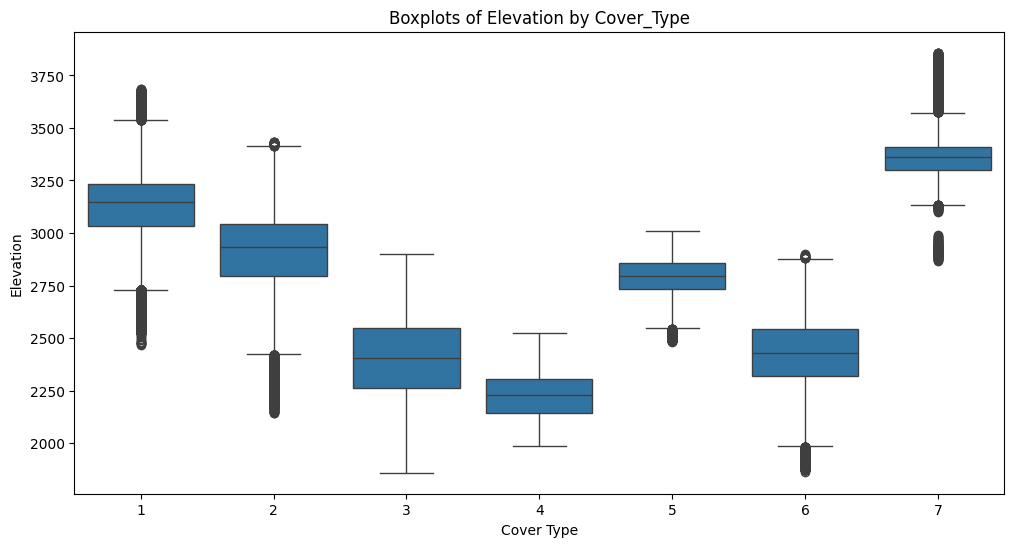

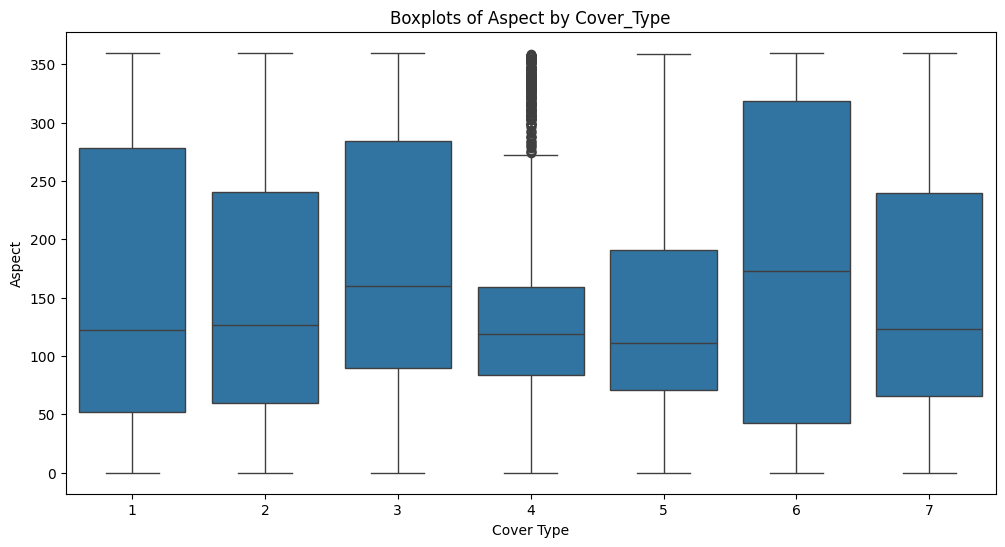

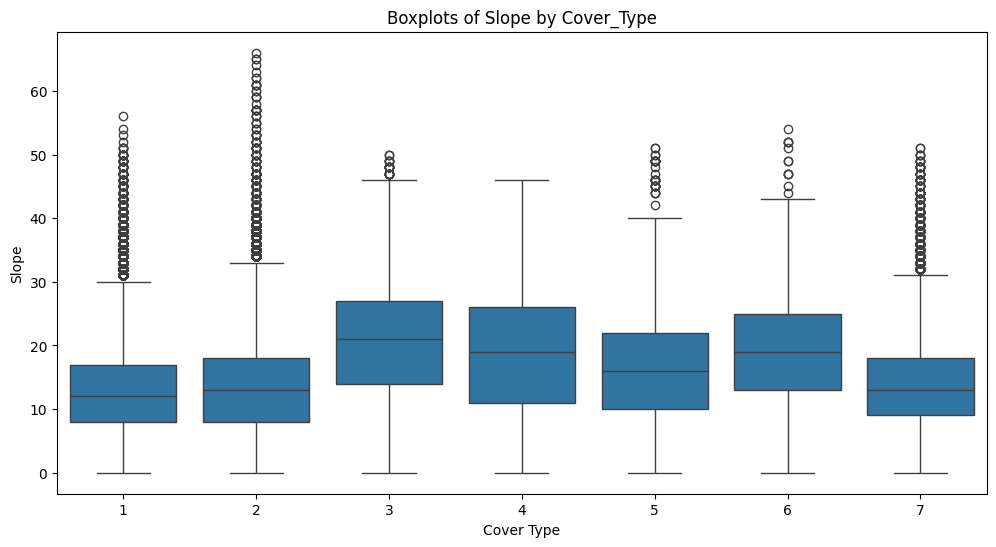

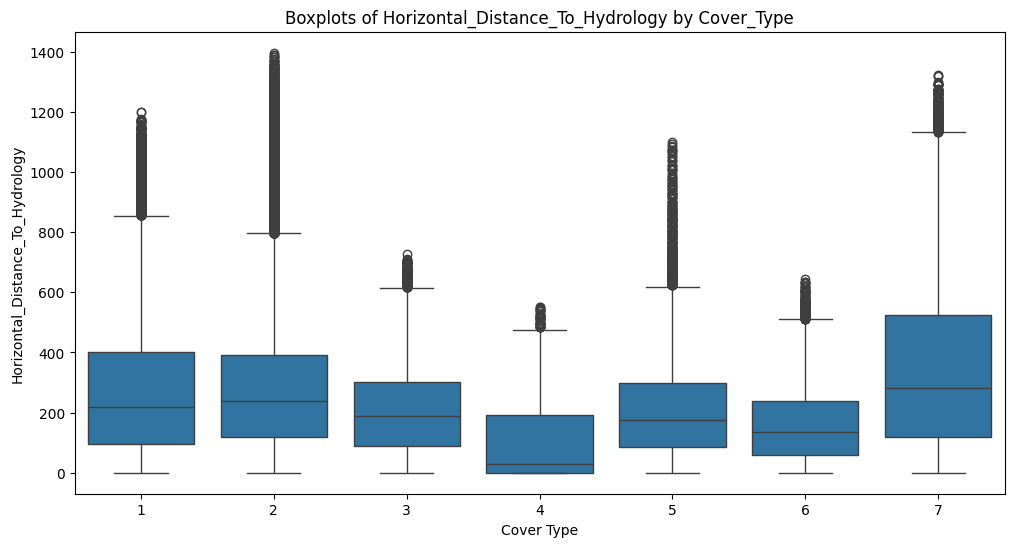

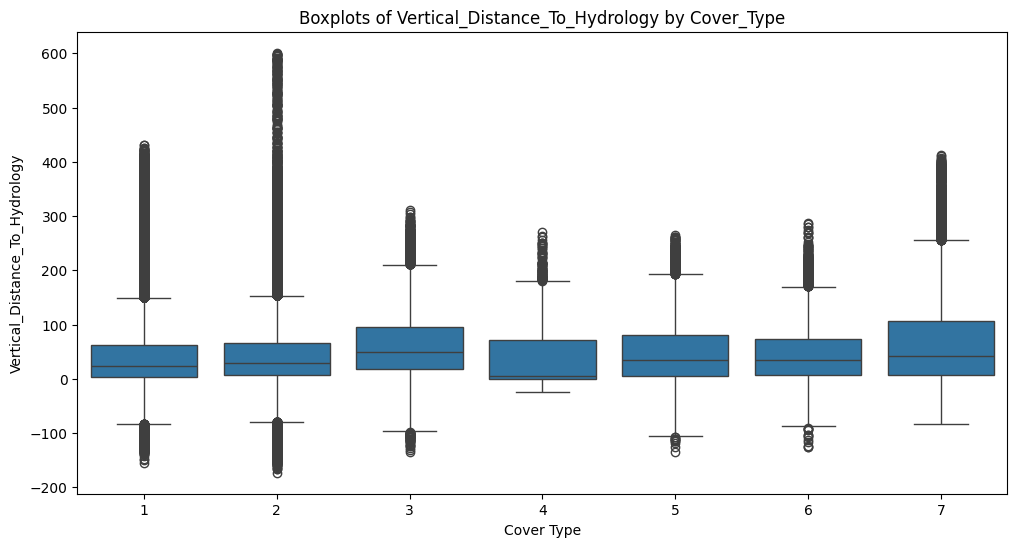

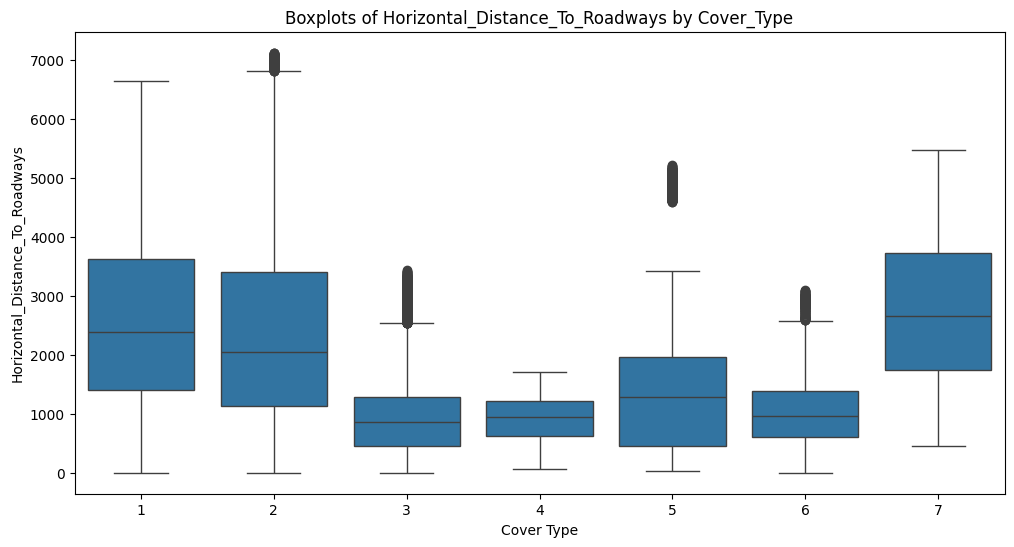

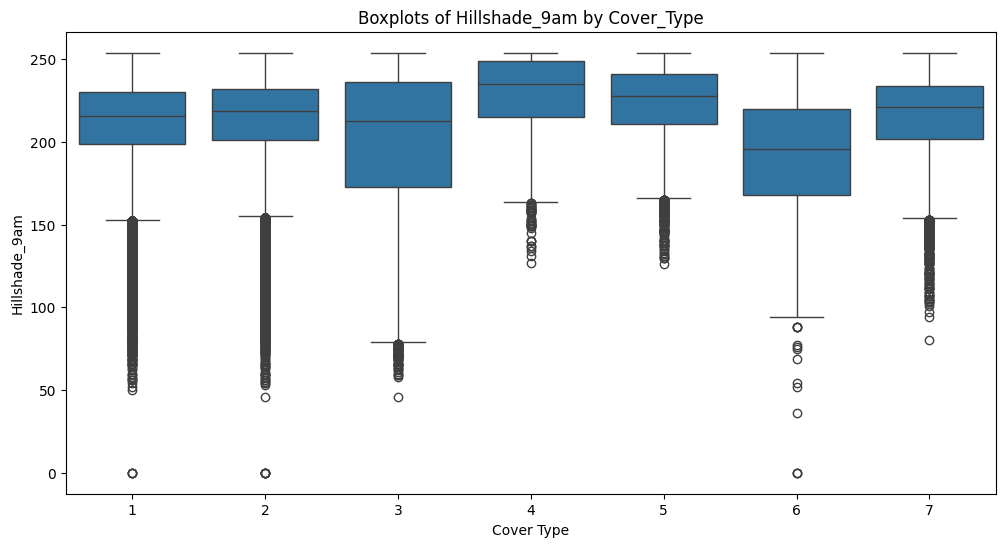

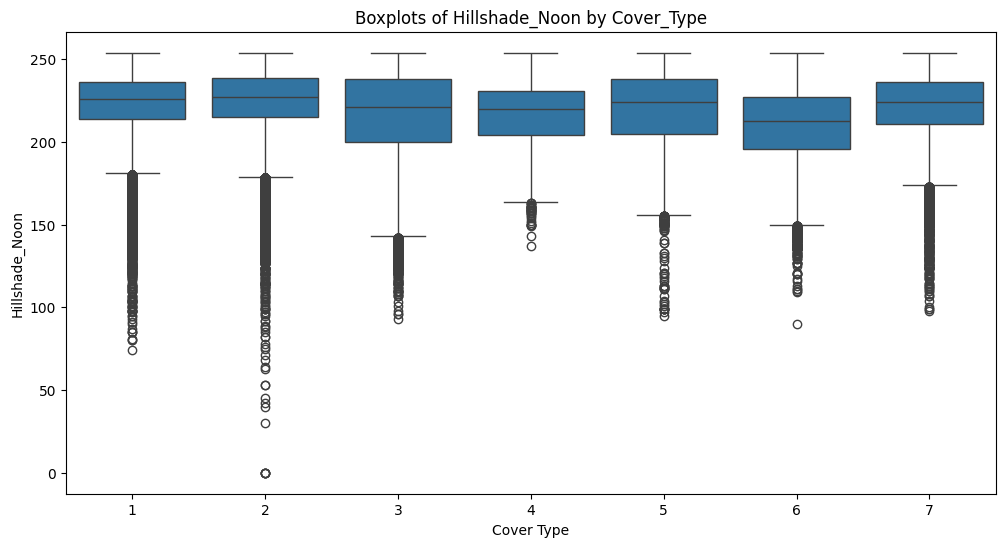

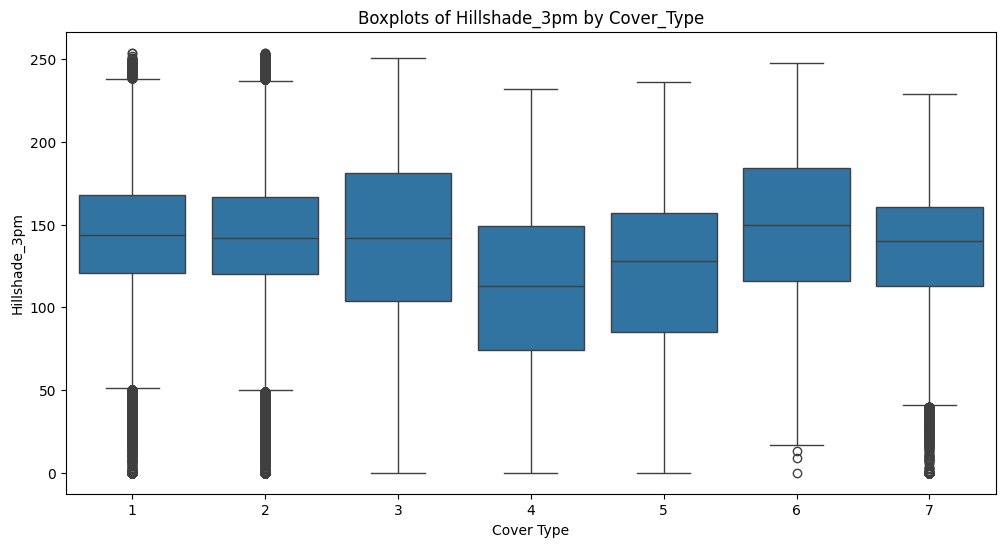

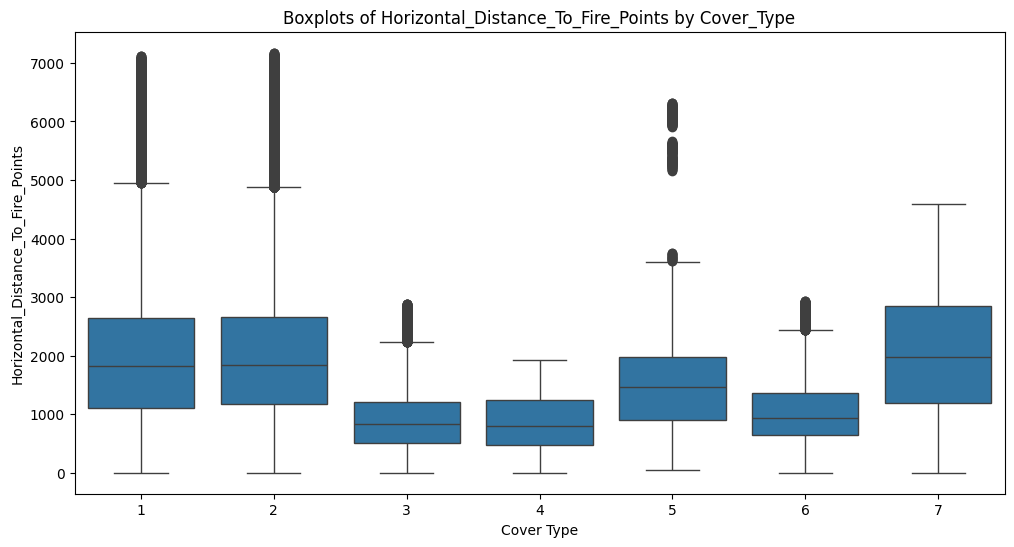

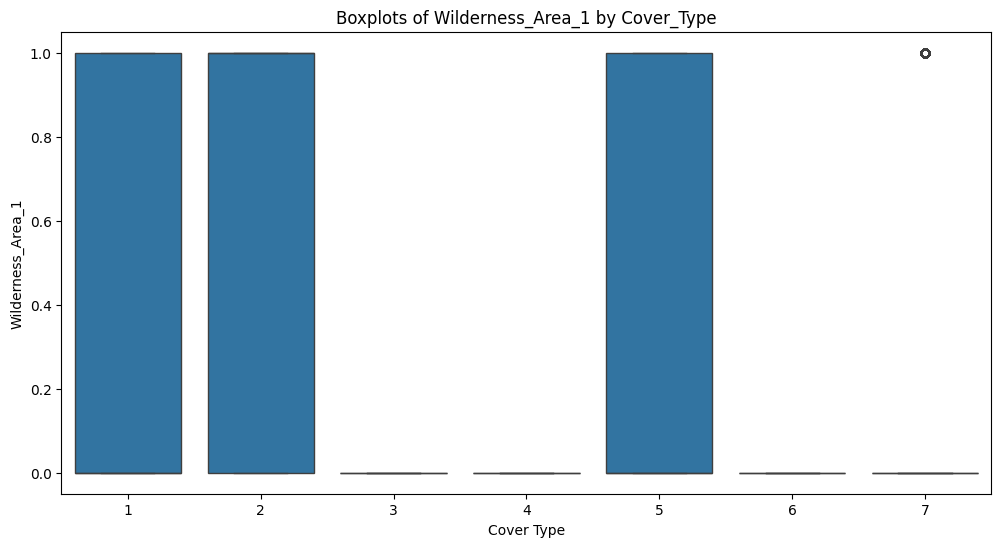

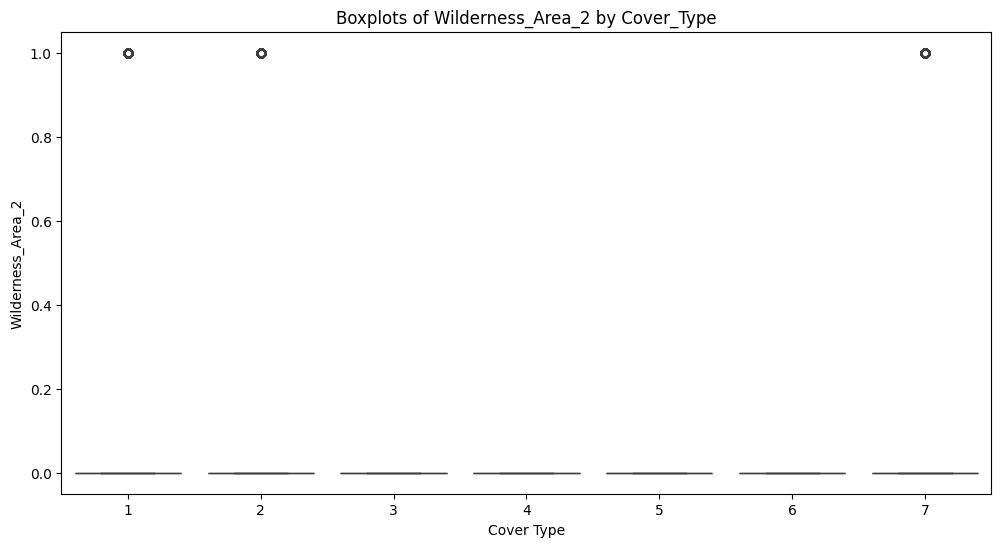

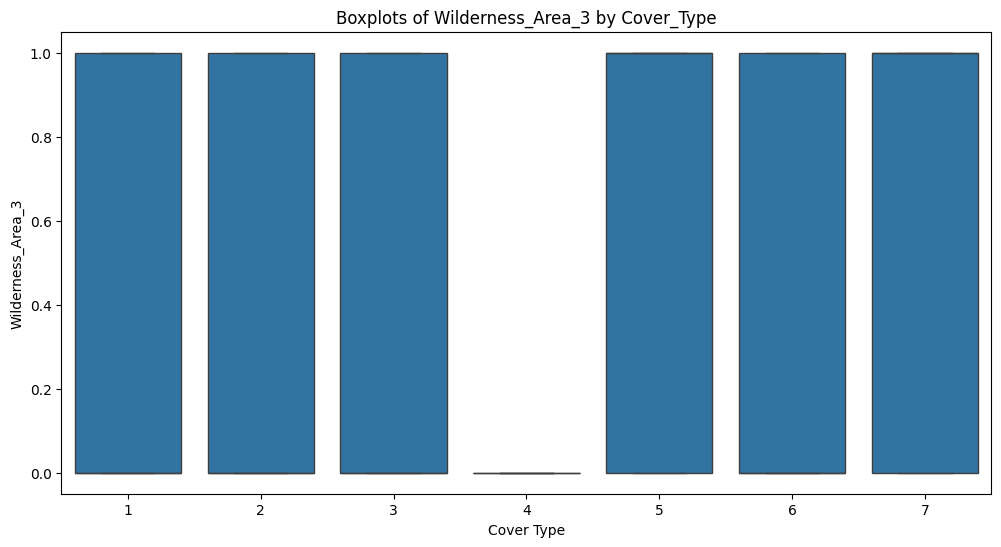

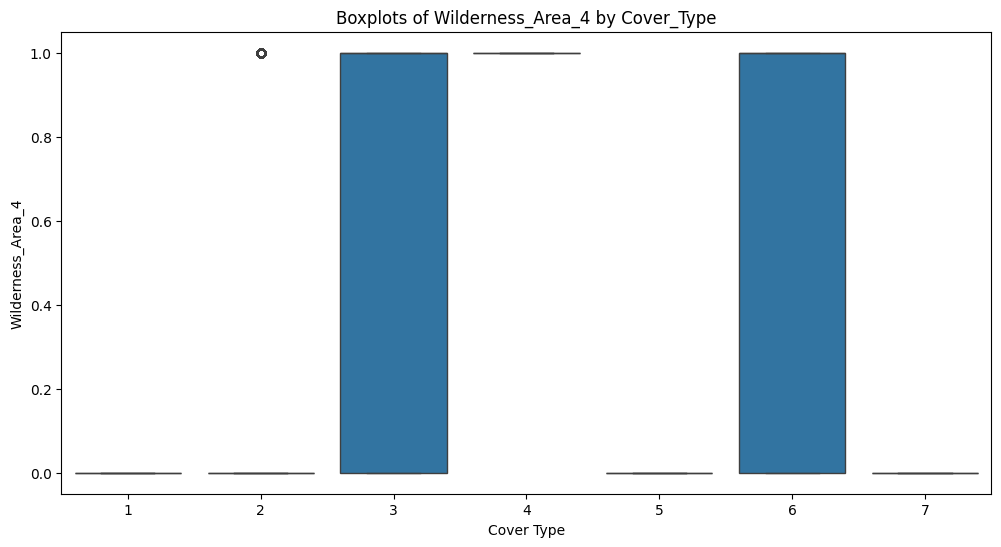

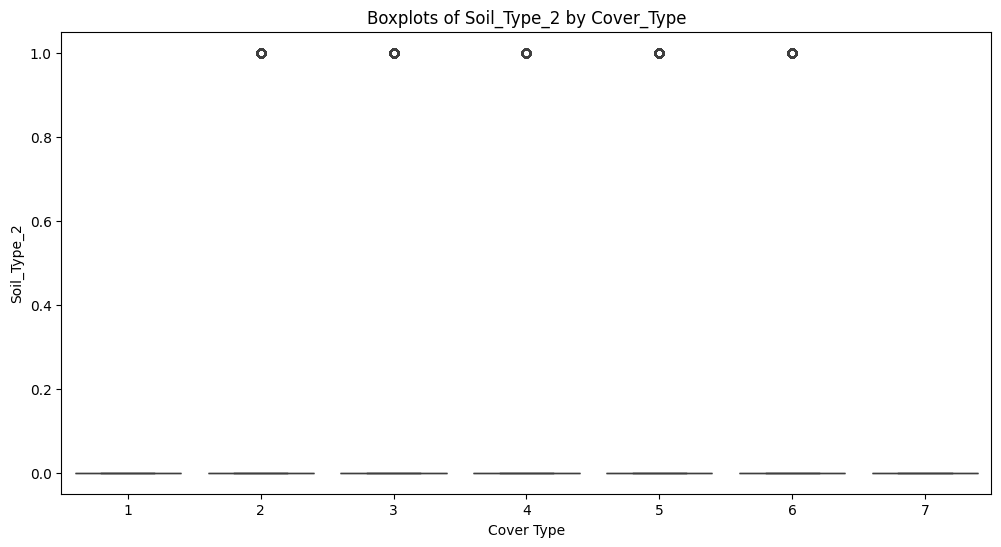

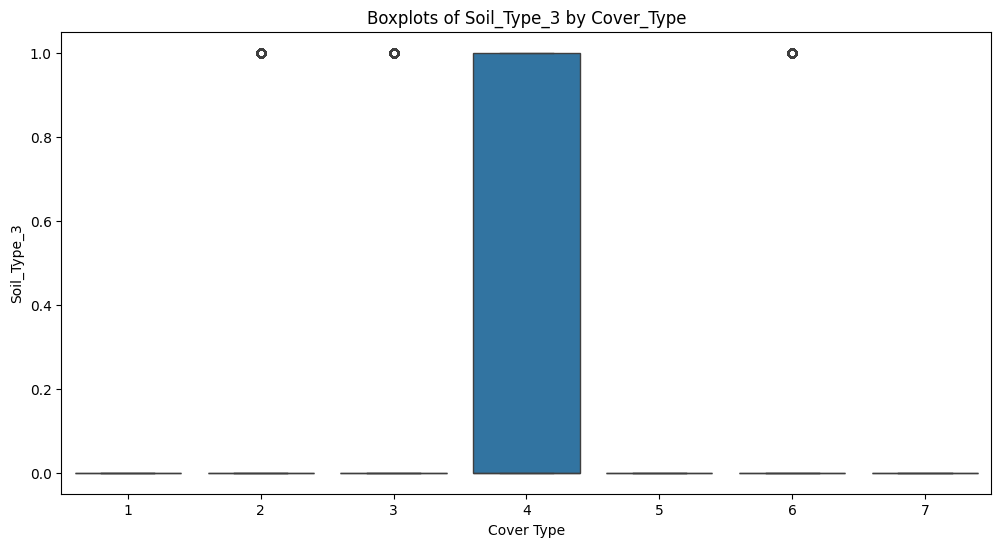

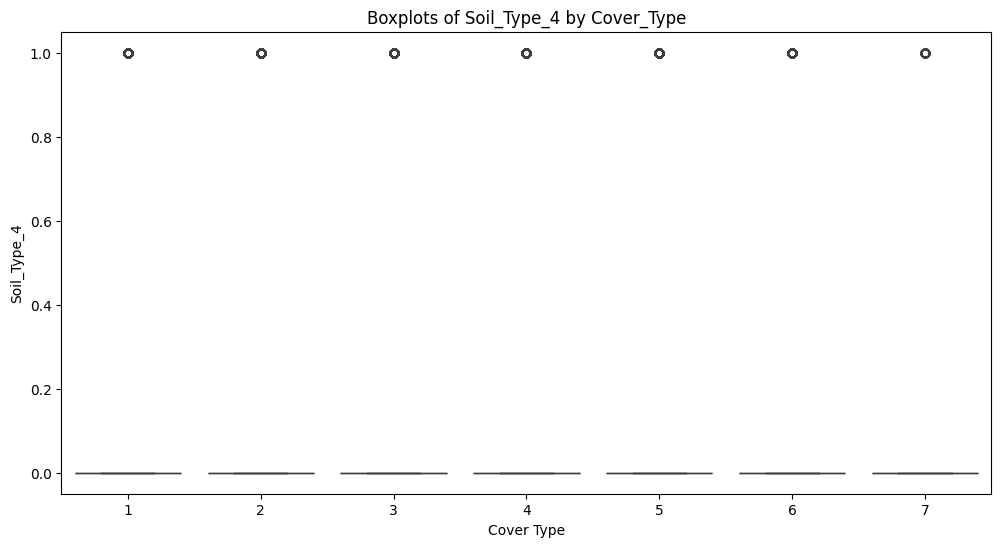

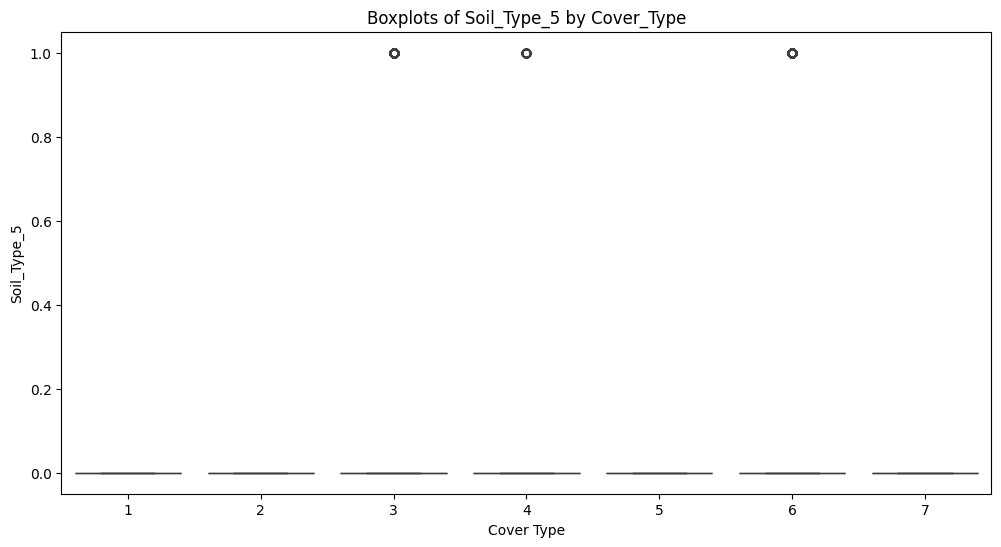

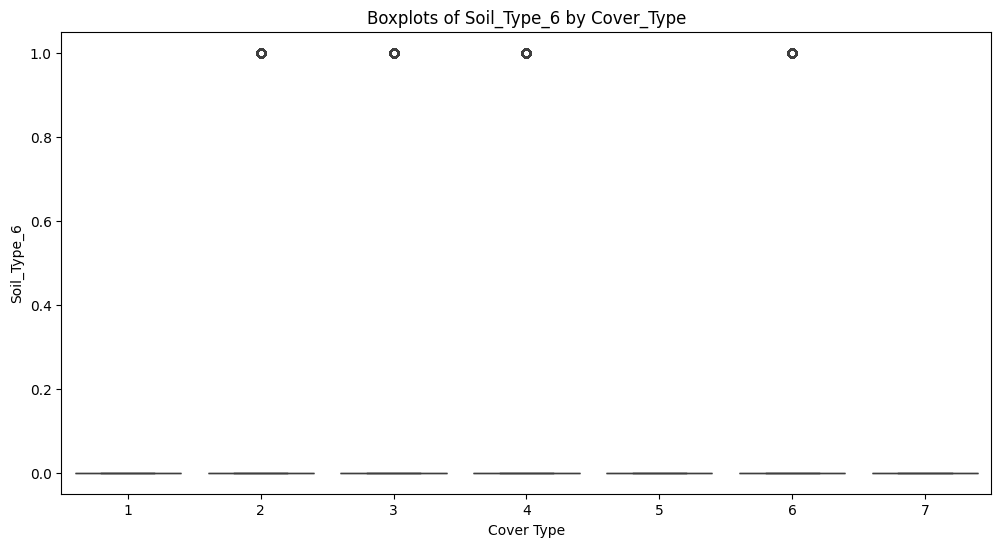

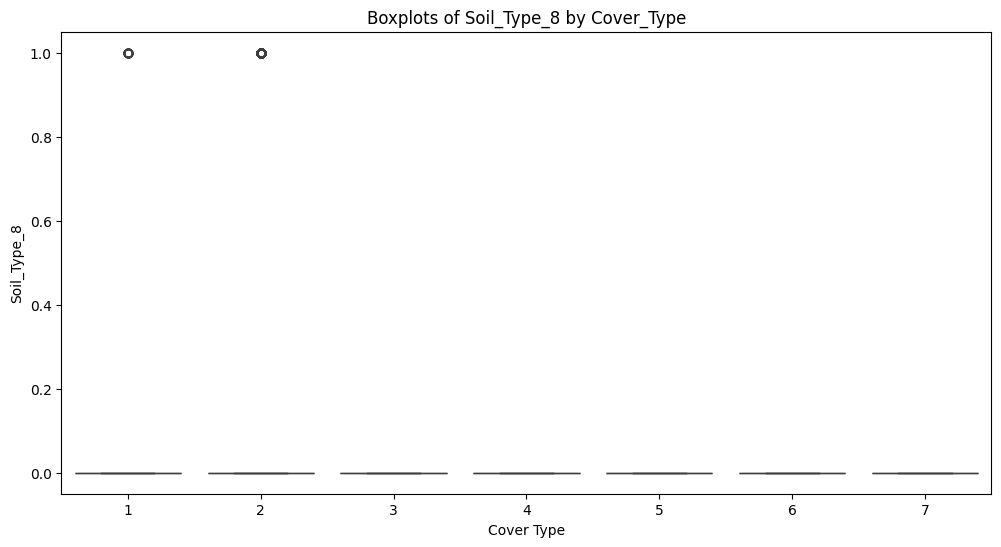

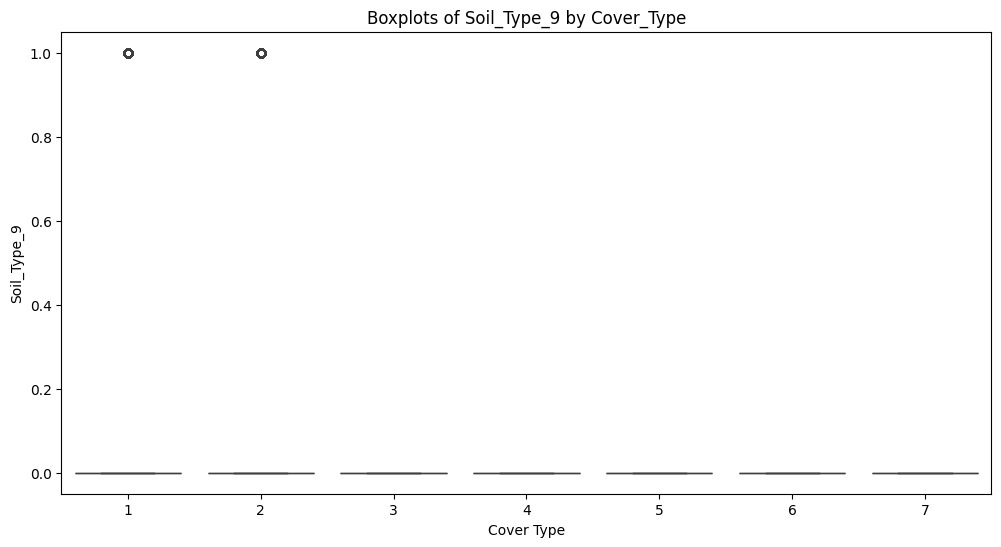

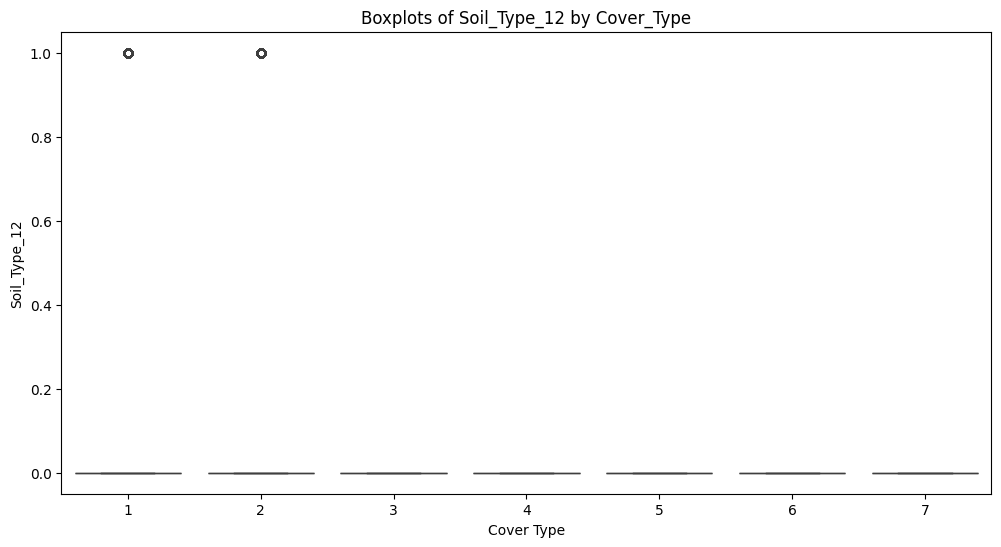

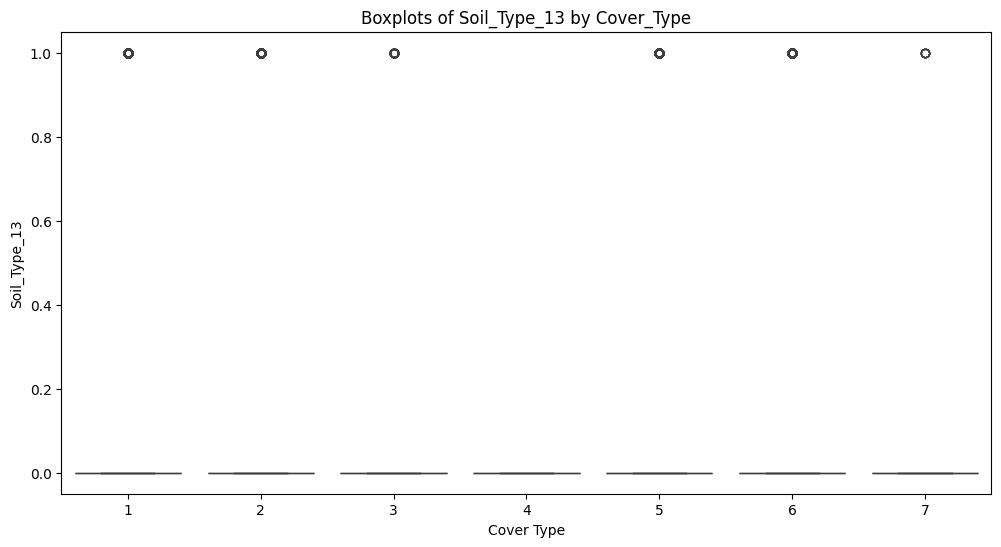

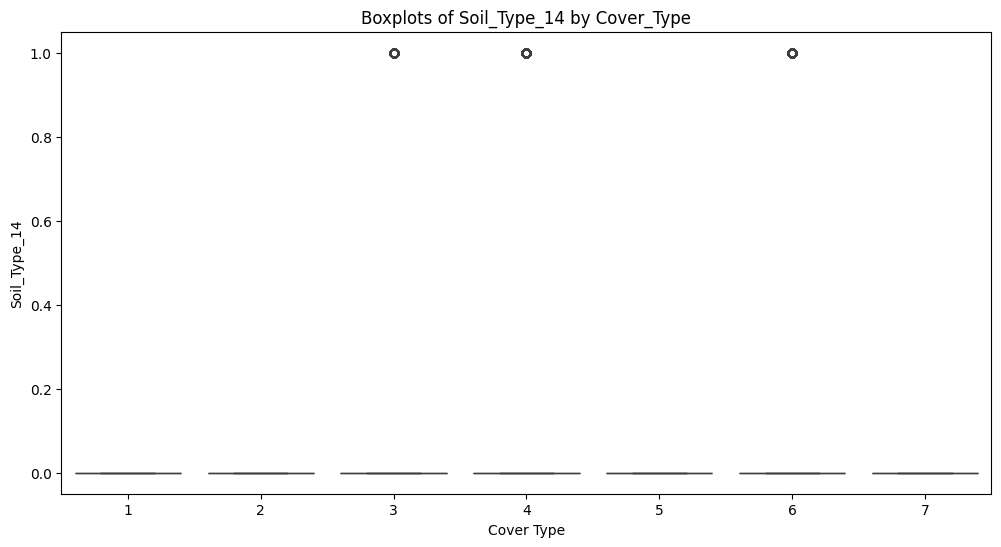

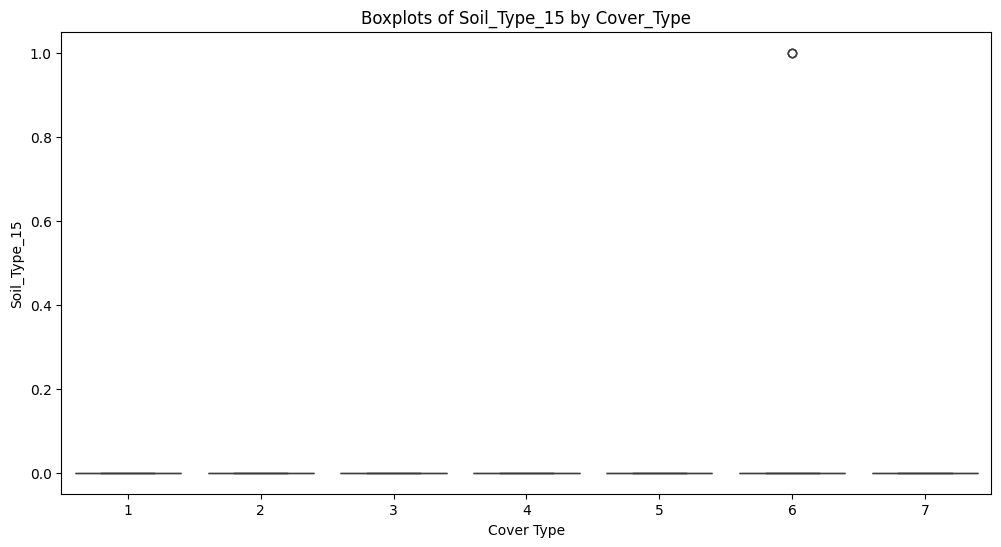

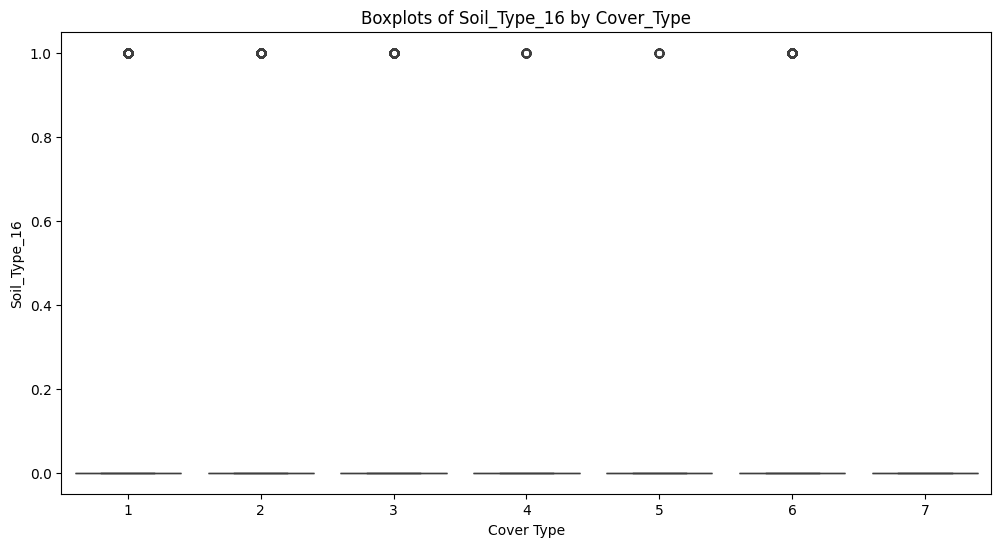

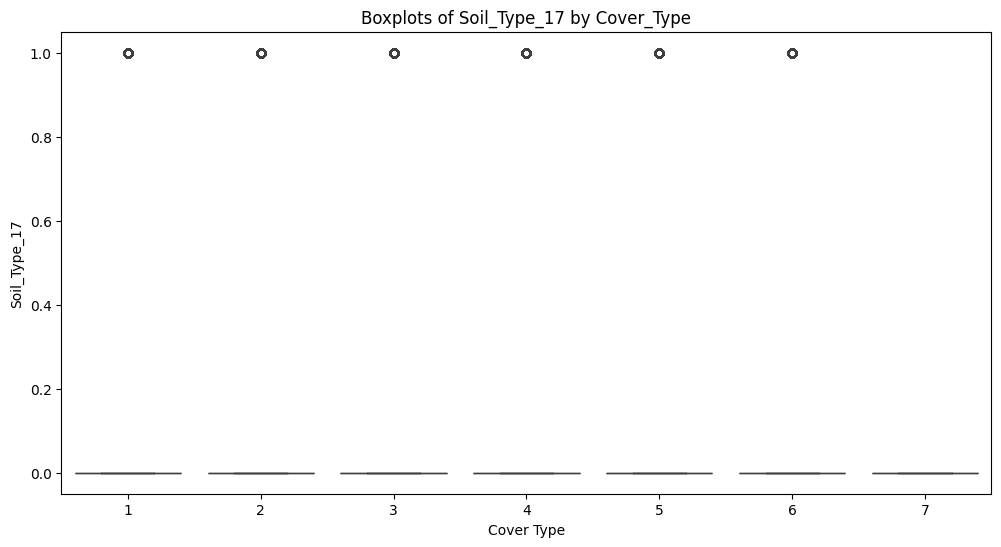

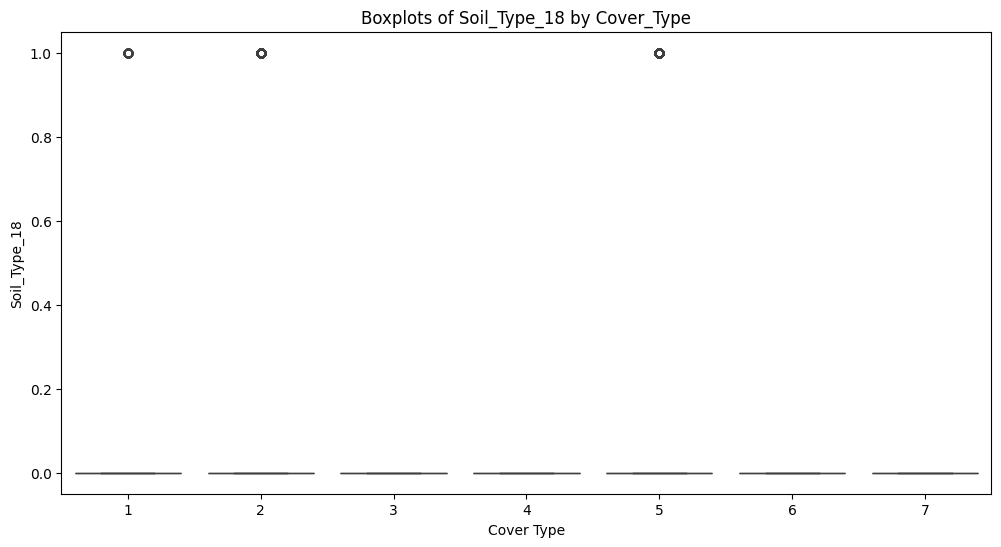

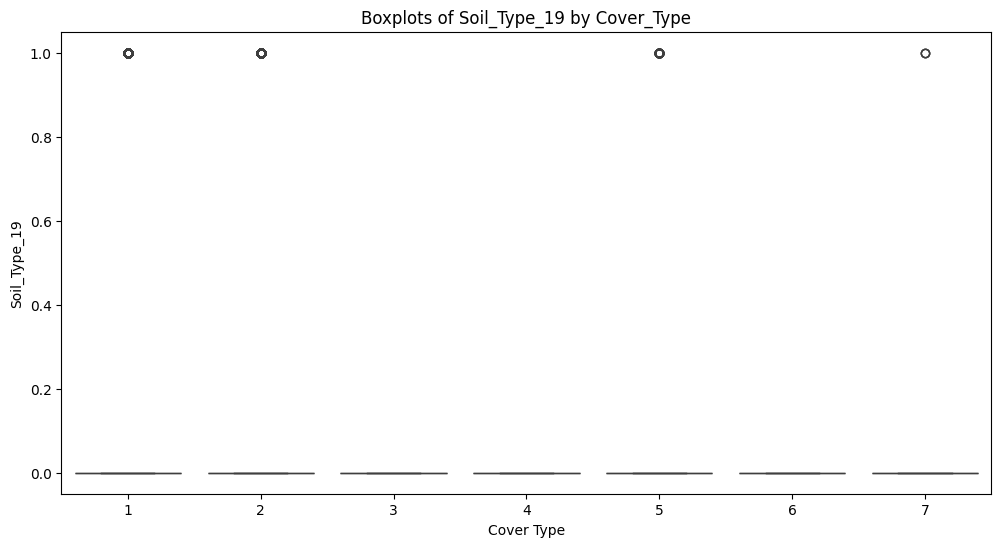

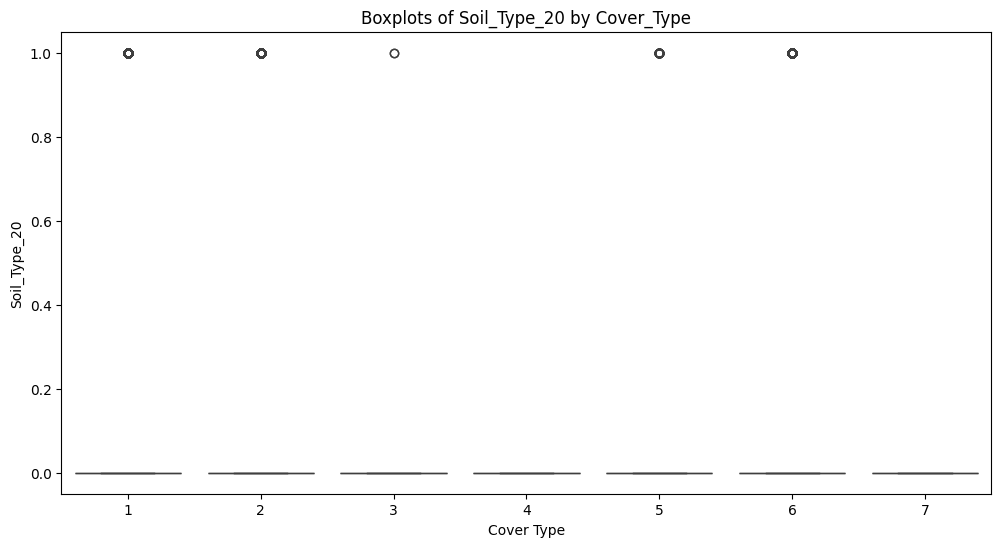

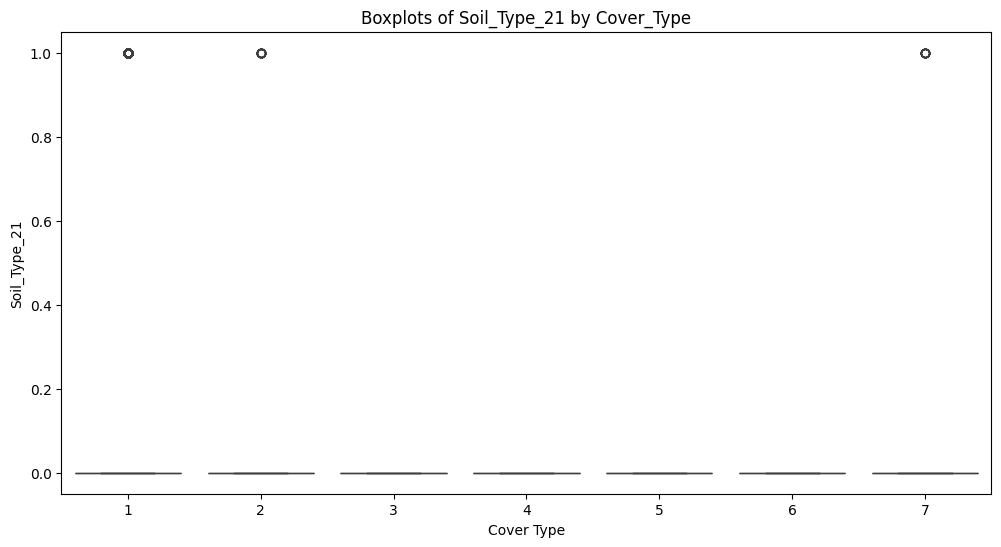

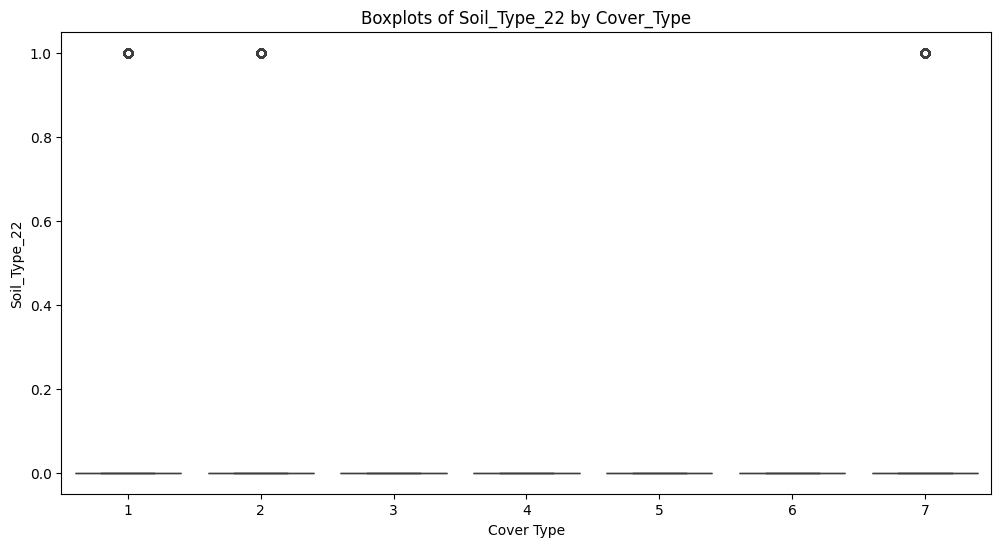

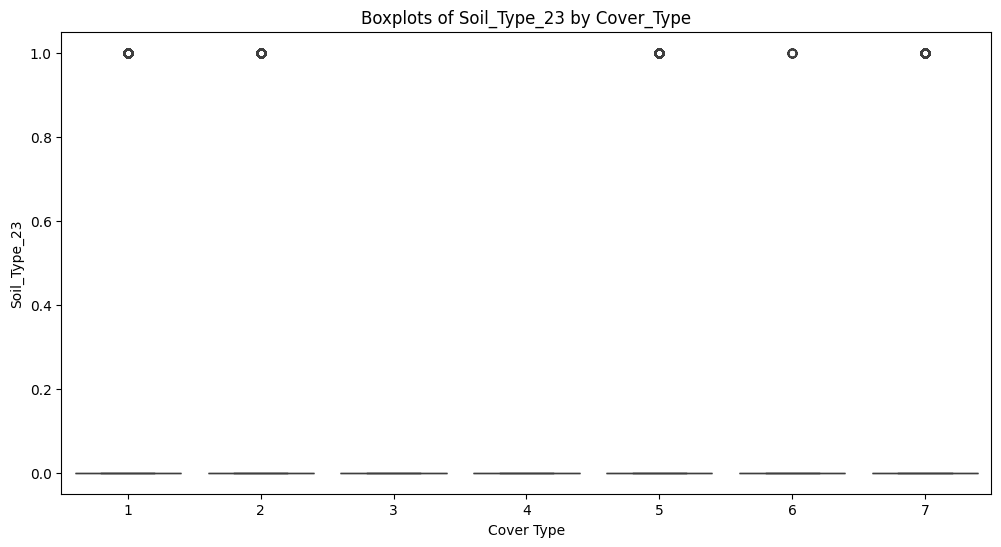

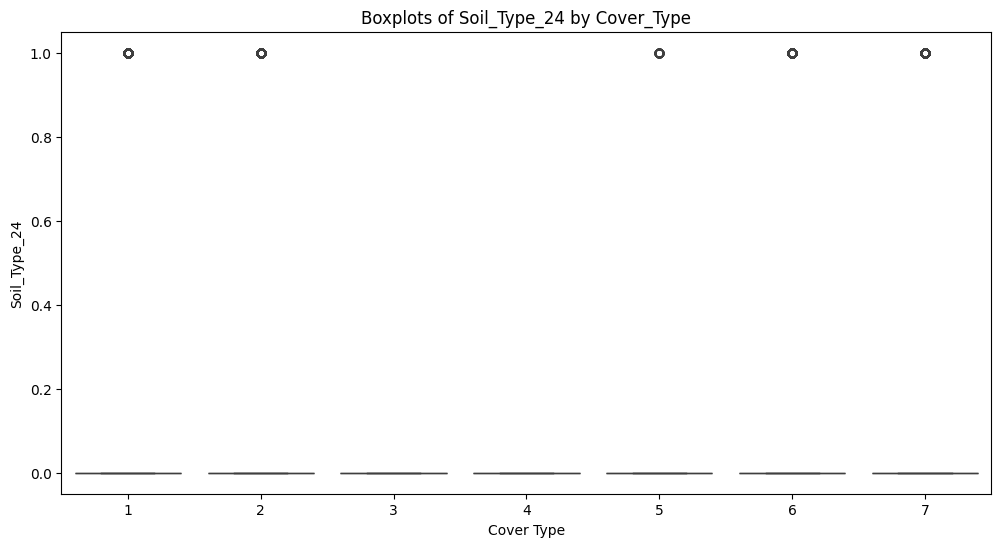

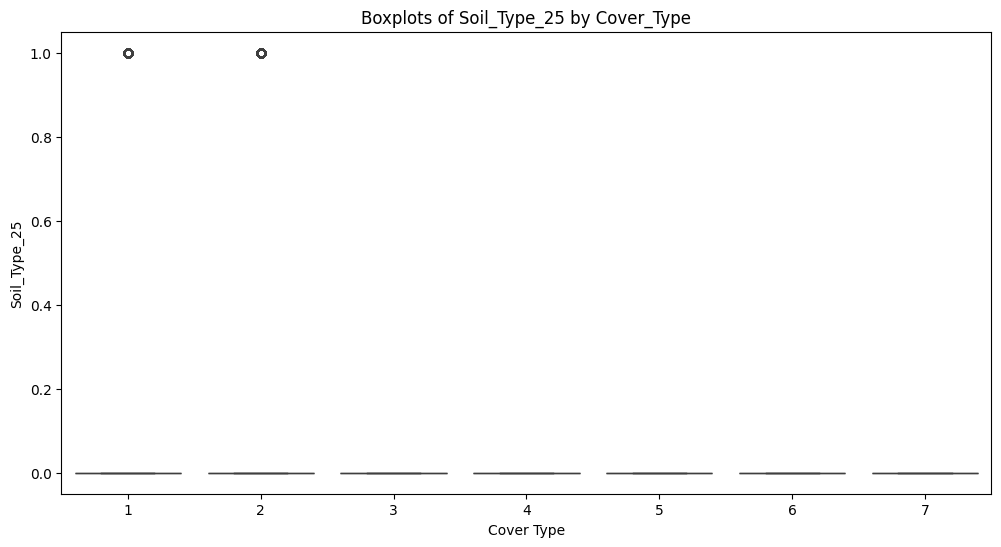

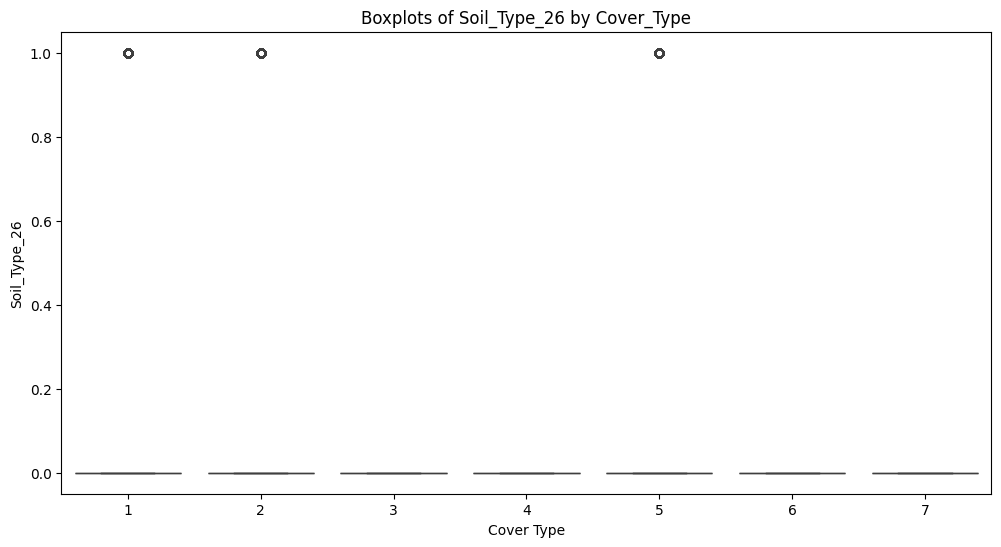

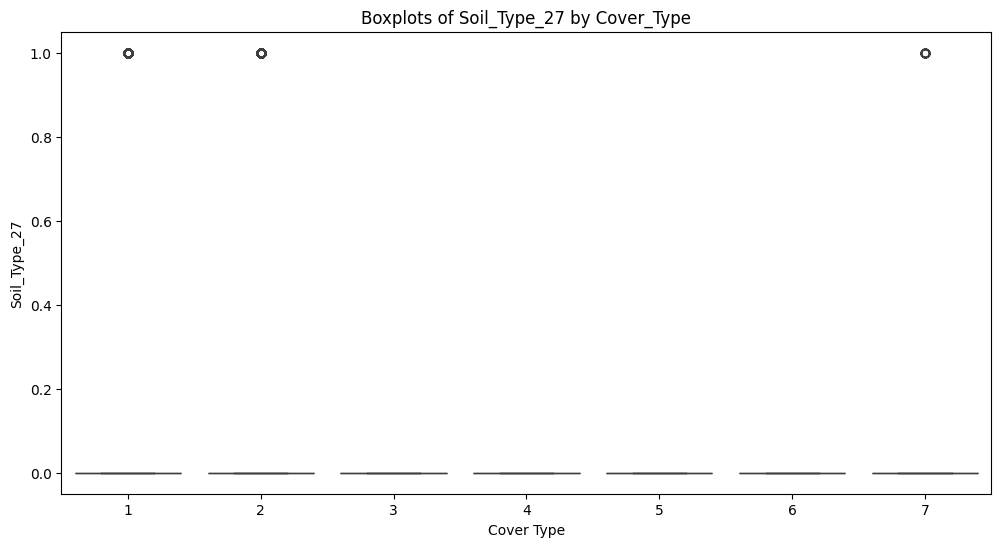

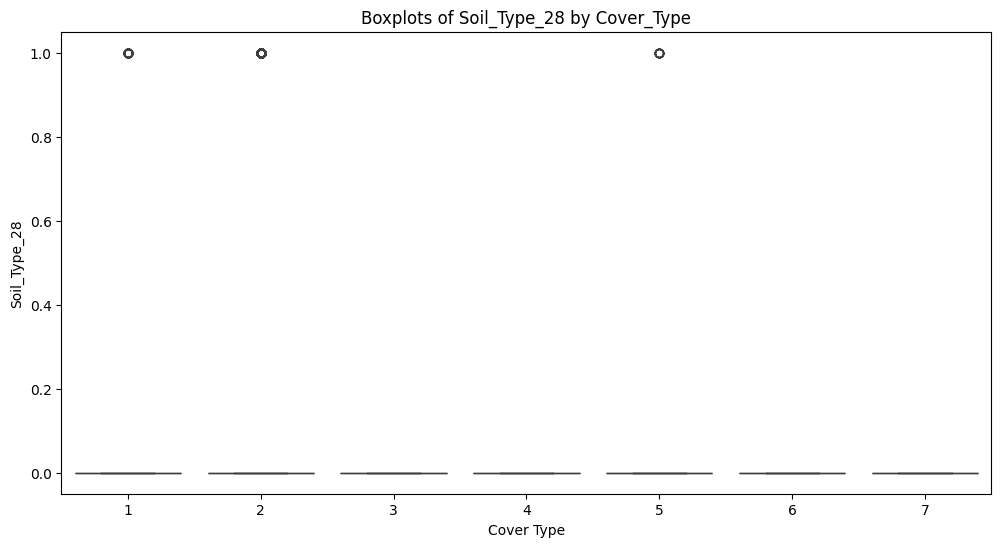

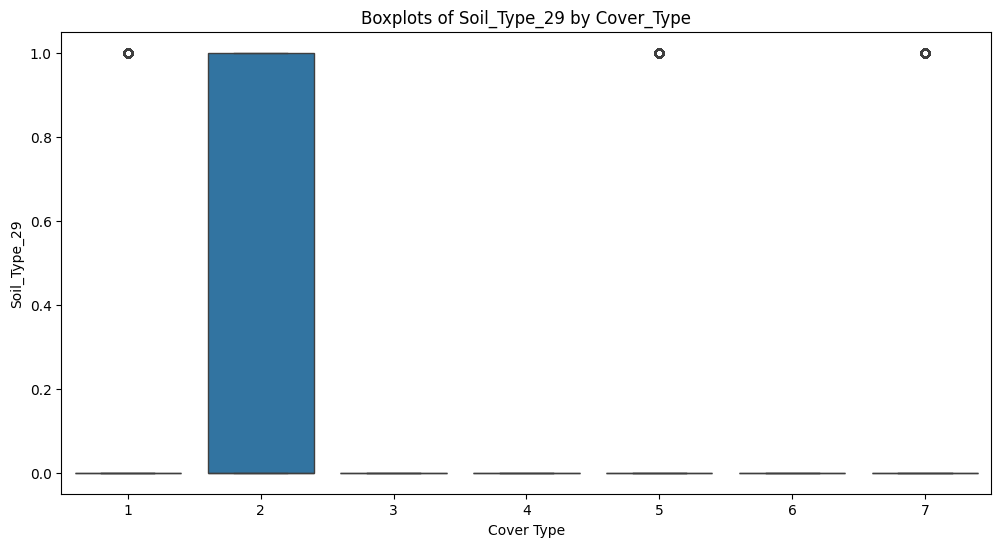

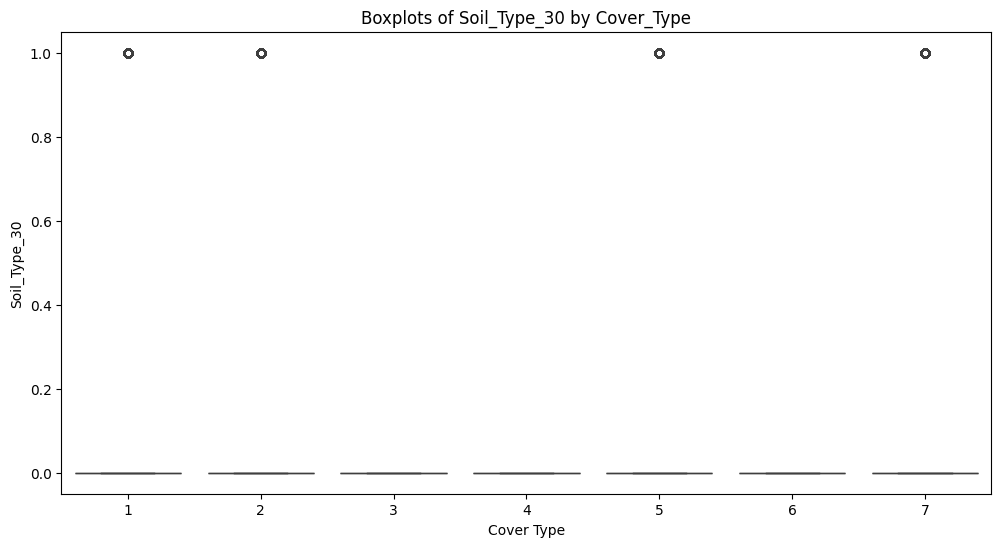

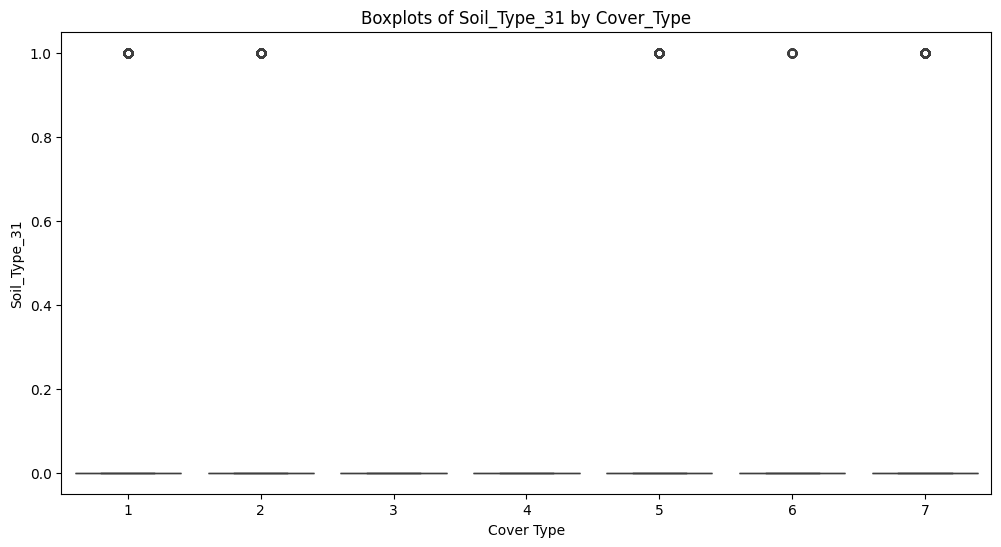

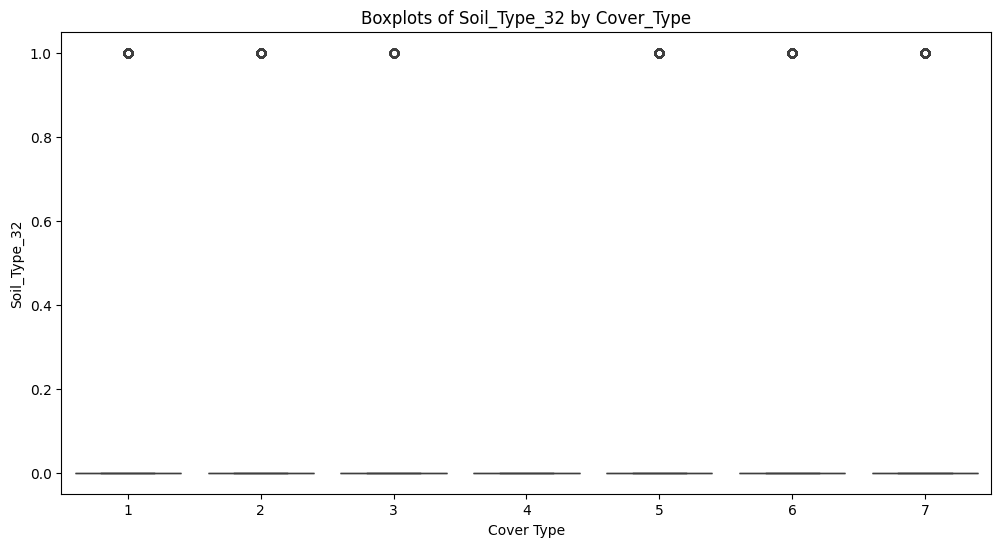

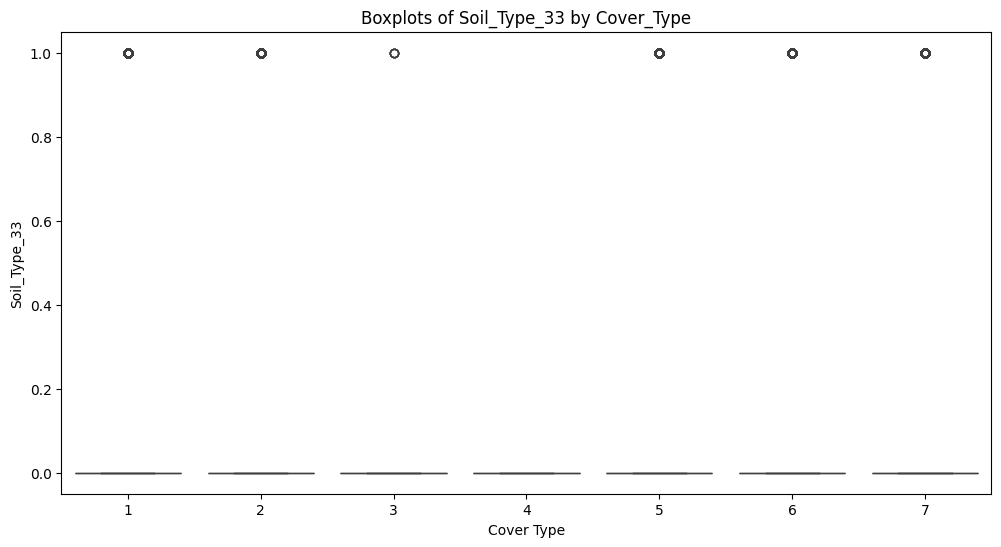

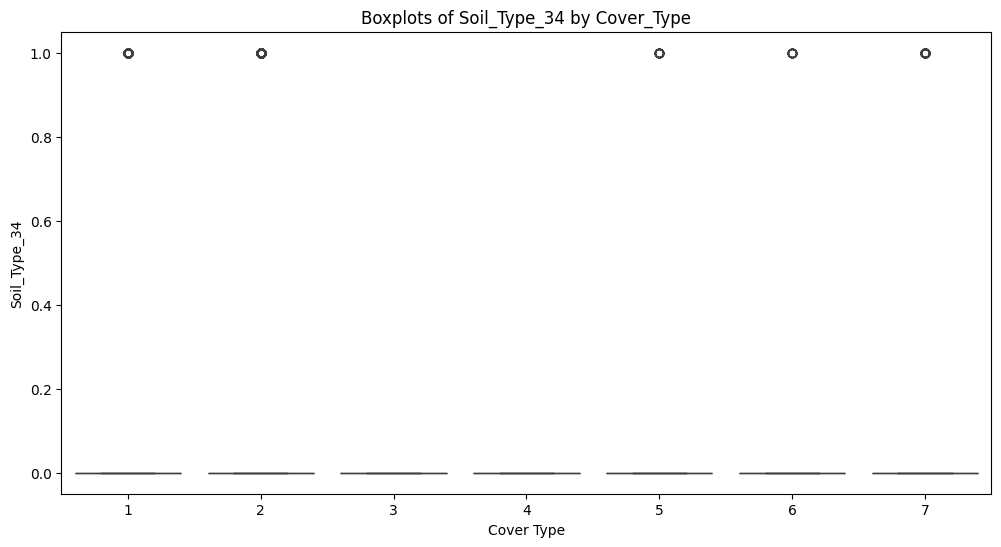

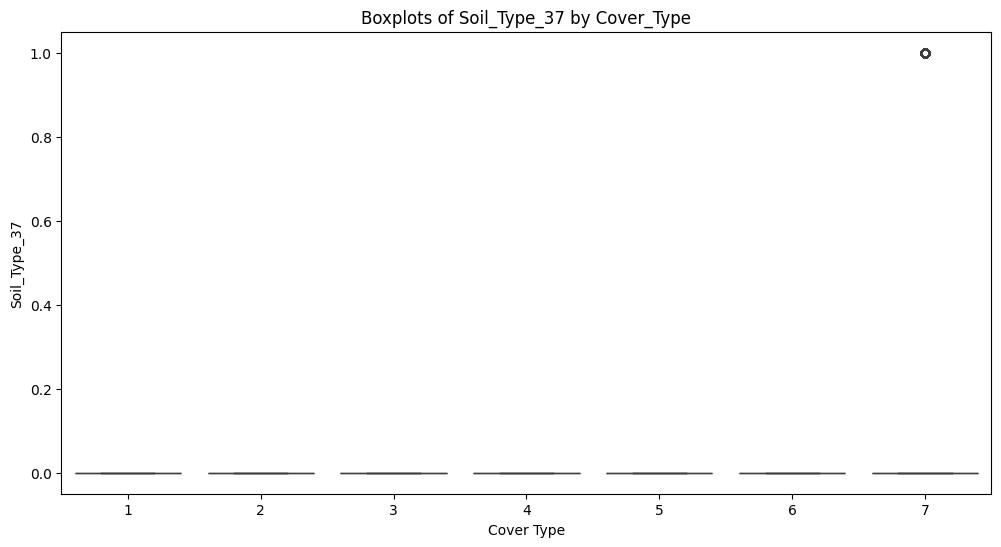

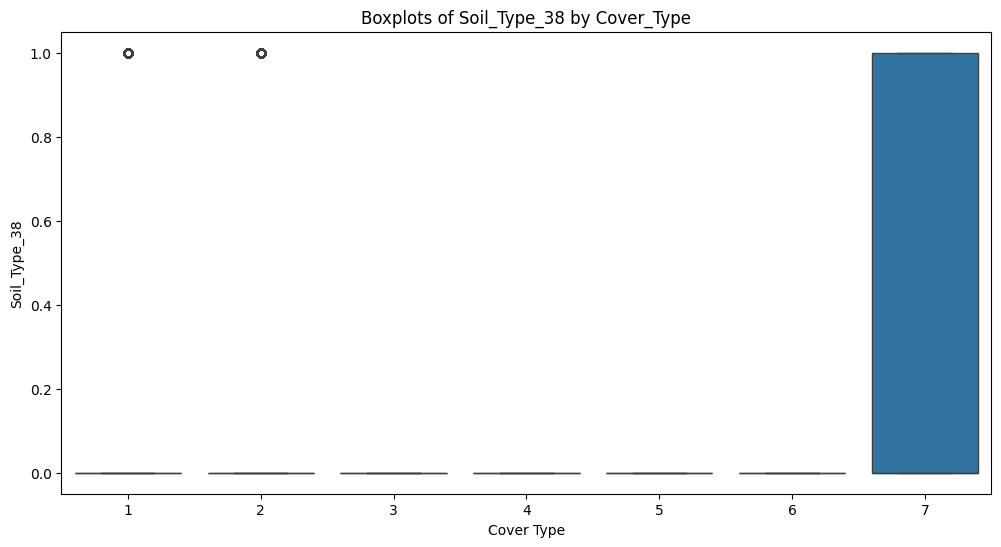

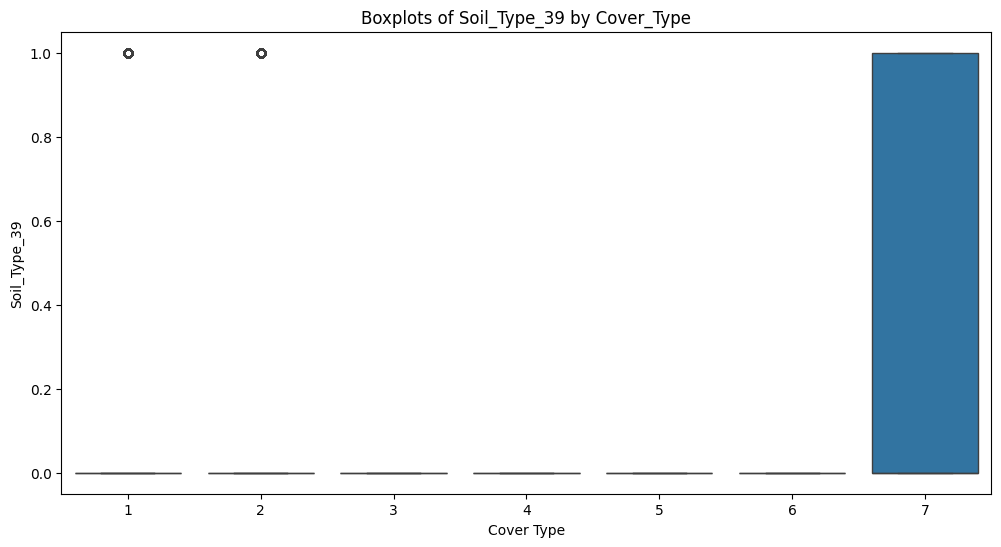

In [26]:

columns_to_plot = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am',
    'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
    'Wilderness_Area_1', 'Wilderness_Area_2',
    'Wilderness_Area_3', 'Wilderness_Area_4',
    'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3',
    'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6',
    'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9',
    'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
    'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15',
    'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
    'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21',
    'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
    'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27',
    'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
    'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33',
    'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
    'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39',
    'Soil_Type_40', 'Cover_Type'
]
for column in columns_to_plot[:-1]:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Cover_Type', y=column)
    plt.title(f'Boxplots of {column} by Cover_Type')
    plt.xlabel('Cover Type')
    plt.ylabel(column)
    plt.show()

Heat Map

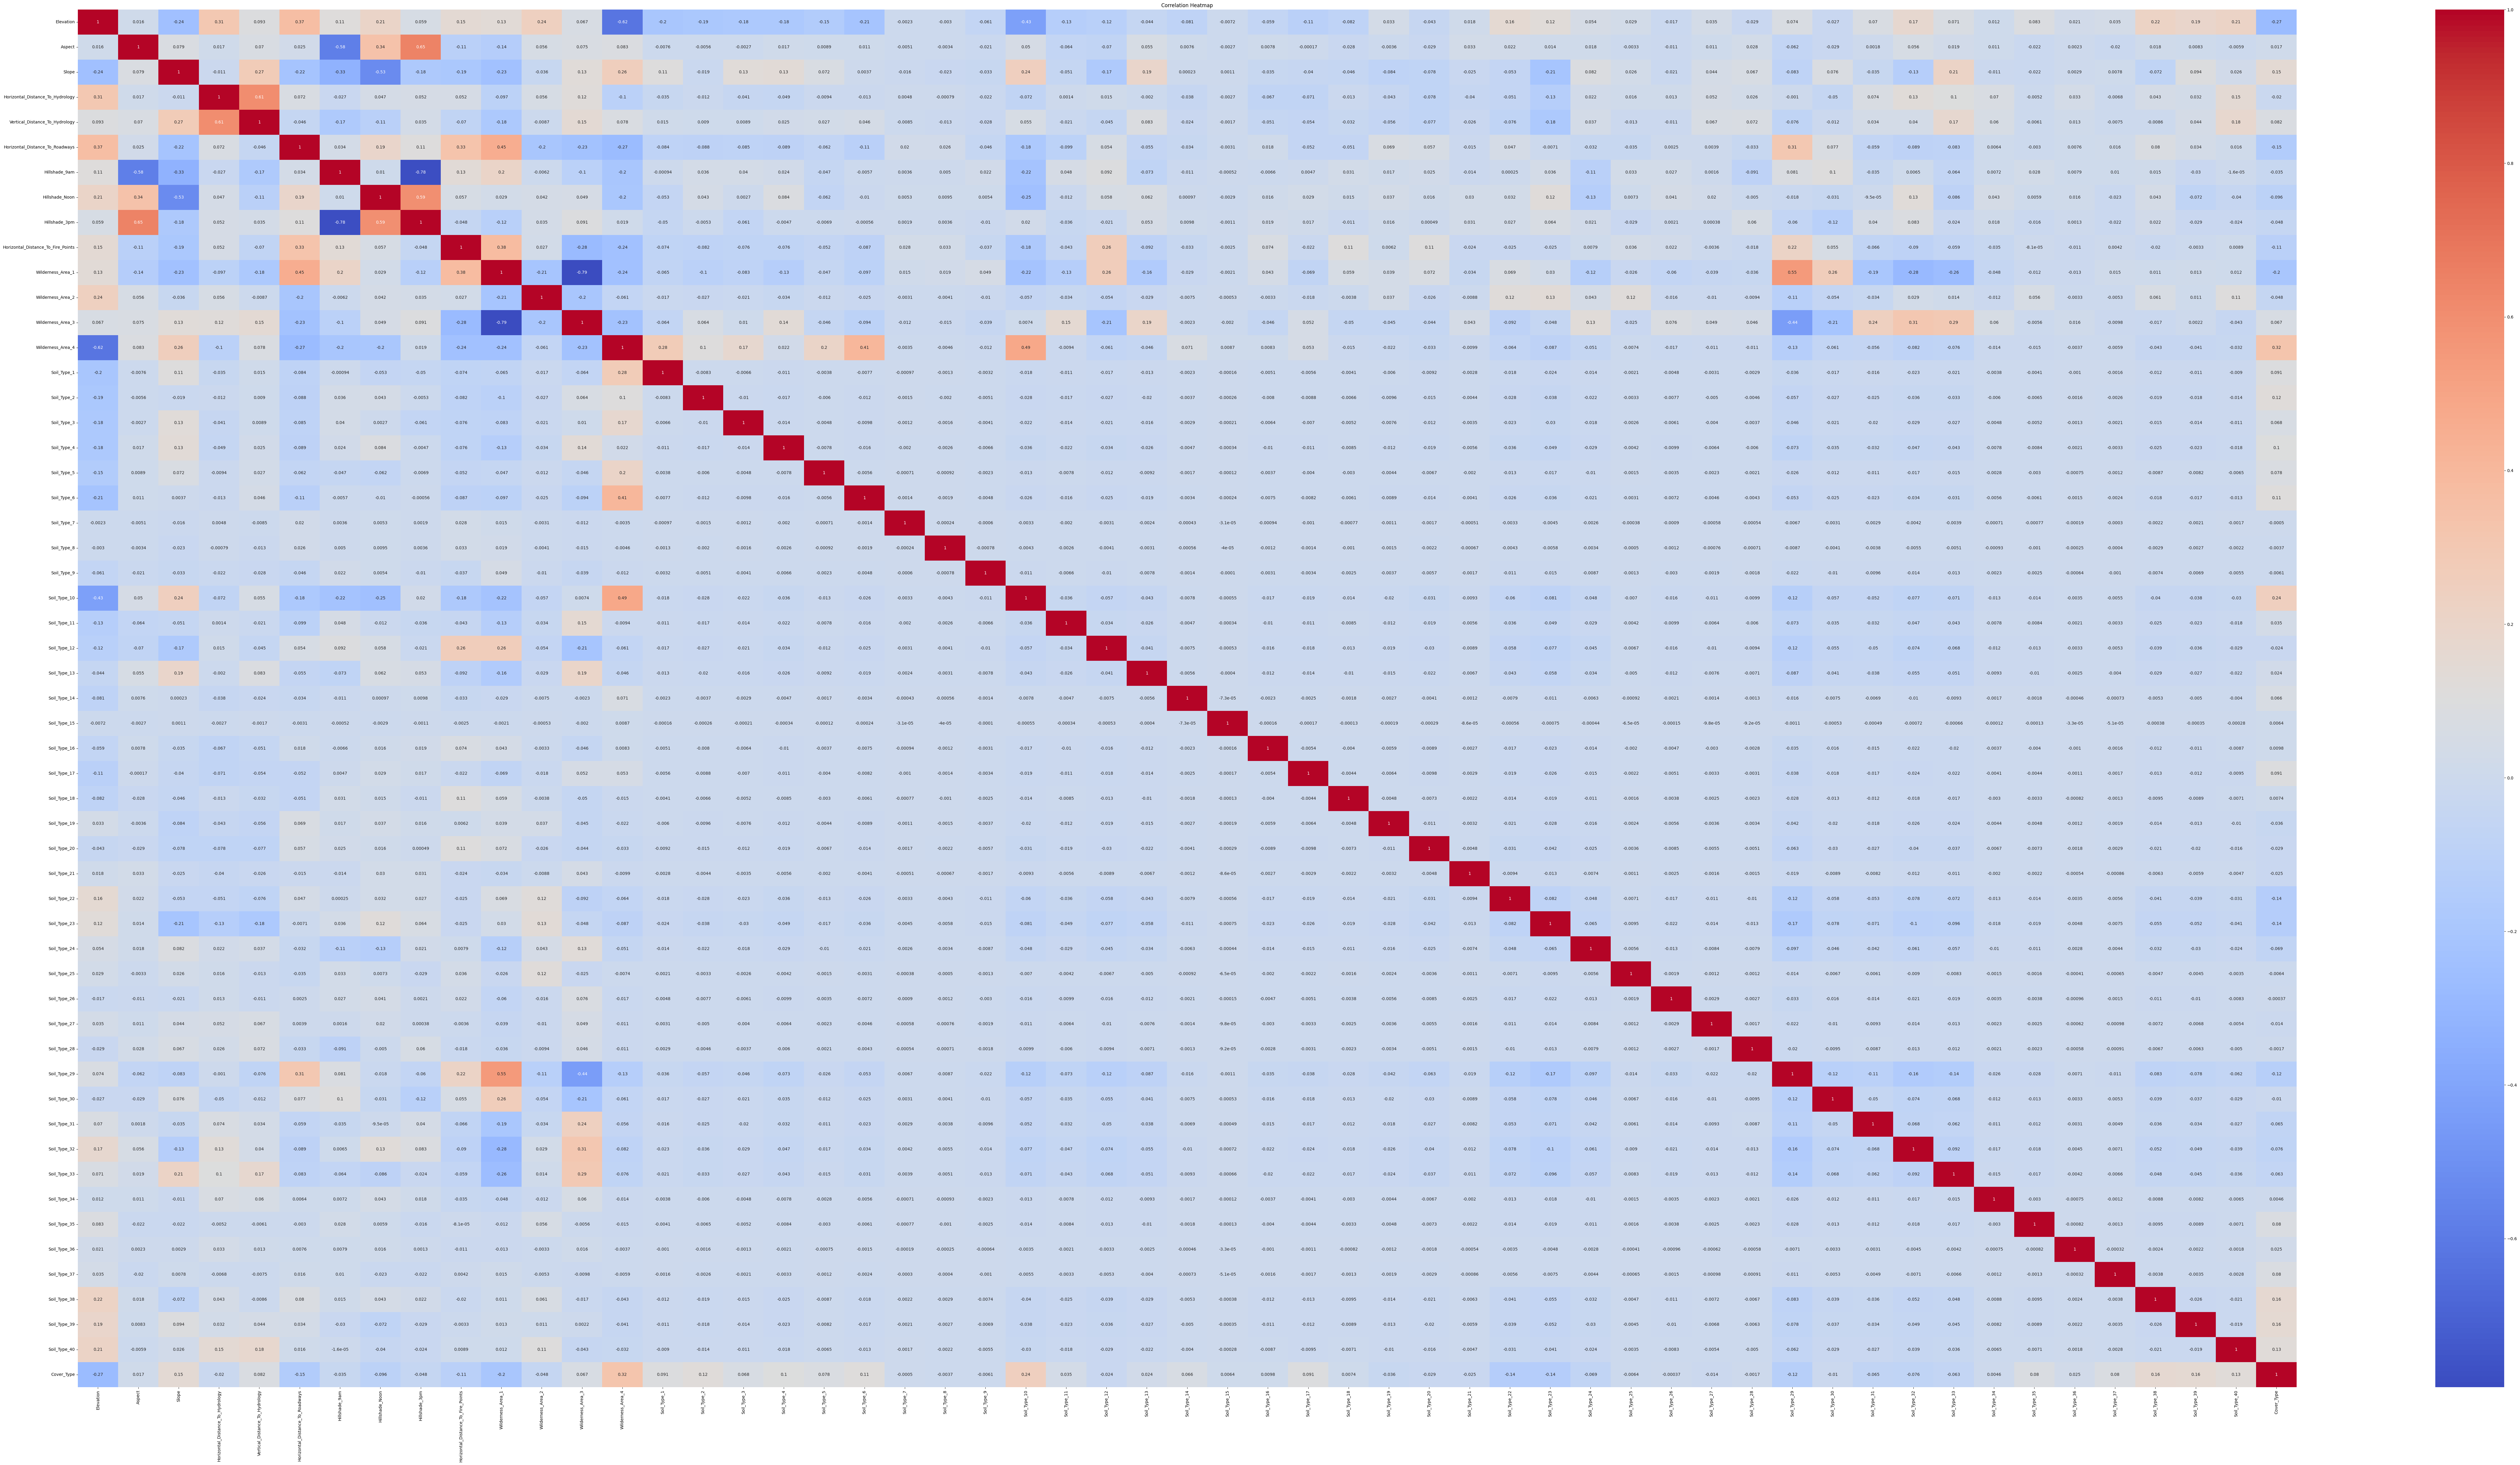

In [27]:
plt.figure(figsize=(120, 60))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [28]:
df.corr()

Elevation    Aspect     Slope  \
Elevation                            1.000000  0.015735 -0.242697   
Aspect                               0.015735  1.000000  0.078728   
Slope                               -0.242697  0.078728  1.000000   
Horizontal_Distance_To_Hydrology     0.306229  0.017376 -0.010607   
Vertical_Distance_To_Hydrology       0.093306  0.070305  0.274976   
Horizontal_Distance_To_Roadways      0.365559  0.025121 -0.215914   
Hillshade_9am                        0.112179 -0.579273 -0.327199   
Hillshade_Noon                       0.205887  0.336103 -0.526911   
Hillshade_3pm                        0.059148  0.646944 -0.175854   
Horizontal_Distance_To_Fire_Points   0.148022 -0.109172 -0.185662   
Wilderness_Area_1                    0.131838 -0.140123 -0.234576   
Wilderness_Area_2                    0.238164  0.055988 -0.036253   
Wilderness_Area_3                    0.066550  0.074904  0.125663   
Wilderness_Area_4                   -0.619374  0.082687  0.255503   
Soil_Type_1                         -0.204512 -0.007574  0.107847   
Soil_Type_2                         -0.187677 -0.005649 -0.018553   
Soil_Type_3                         -0.182463 -0.002730  0.125497   
Soil_Type_4                         -0.183521  0.017212  0.131847   
Soil_Type_5                         -0.150376  0.008938  0.072311   
Soil_Type_6                         -0.214606  0.010766  0.003673   
Soil_Type_7                         -0.002252 -0.005052 -0.015661   
Soil_Type_8                         -0.003021 -0.003366 -0.023359   
Soil_Type_9                         -0.060915 -0.020800 -0.032752   
Soil_Type_10                        -0.428746  0.049835  0.244037   
Soil_Type_11                        -0.134227 -0.064344 -0.050894   
Soil_Type_12                        -0.118905 -0.070209 -0.169300   
Soil_Type_13                        -0.043984  0.054544  0.192423   
Soil_Type_14                        -0.080825  0.007597  0.000228   
Soil_Type_15                        -0.007153 -0.002660  0.001081   
Soil_Type_16                        -0.059446  0.007846 -0.034791   
Soil_Type_17                        -0.111028 -0.000168 -0.040208   
Soil_Type_18                        -0.081811 -0.028353 -0.045851   
Soil_Type_19                         0.033144 -0.003635 -0.083743   
Soil_Type_20                        -0.043128 -0.029440 -0.077582   
Soil_Type_21                         0.017557  0.032998 -0.025461   
Soil_Type_22                         0.158959  0.021578 -0.053396   
Soil_Type_23                         0.124356  0.013676 -0.207397   
Soil_Type_24                         0.053582  0.018164  0.082434   
Soil_Type_25                         0.028753 -0.003265  0.026364   
Soil_Type_26                        -0.016657 -0.010661 -0.021449   
Soil_Type_27                         0.035254  0.011328  0.043695   
Soil_Type_28                        -0.029270  0.027535  0.067052   
Soil_Type_29                         0.074327 -0.062181 -0.082941   
Soil_Type_30                        -0.026667 -0.028922  0.075864   
Soil_Type_31                         0.070405  0.001763 -0.034610   
Soil_Type_32                         0.167077  0.056233 -0.133504   
Soil_Type_33                         0.070633  0.019163  0.208942   
Soil_Type_34                         0.011731  0.010861 -0.011002   
Soil_Type_35                         0.083005 -0.021991 -0.022228   
Soil_Type_36                         0.021107  0.002281  0.002918   
Soil_Type_37                         0.035433 -0.020398  0.007848   
Soil_Type_38                         0.217179  0.017706 -0.072208   
Soil_Type_39                         0.193595  0.008294  0.093602   
Soil_Type_40                         0.212612 -0.005866  0.025637   
Cover_Type                          -0.269554  0.017080  0.148285   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.306229   
Aspect                     

In [29]:
df=df.drop(['Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4',
                'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8',
                'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12',
                'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
                'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20',
                'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24',
                'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28',
                'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32',
                'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36',
                'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40'],axis=1)

In [30]:
df

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area_1  \
0                                     6279                  1   
1                                     6225                  1   
2                                     6121                  1   
3                                     6211                  1   
4                                     6172                  1   
...                                    ...                ...   
581007                                 837                  0   
581008                                 845                  0   
581009                                 854                  0   
581010                                 864                  0   
581011                                 875                  0   

        Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4  Cover_Type  
0                       0                  0                  0           5  
1                       0                  0                  0           5  
2                       0                  0                  0           2  
3                       0                  0                  0           2  
4                       0                  0                  0           5  
...                   ...                ...                ...         ...  
581007                  0                  1                  0           3  
581008                  0                  1                  0           3  
581009                  0                  1                  0           3  
581010                  0       

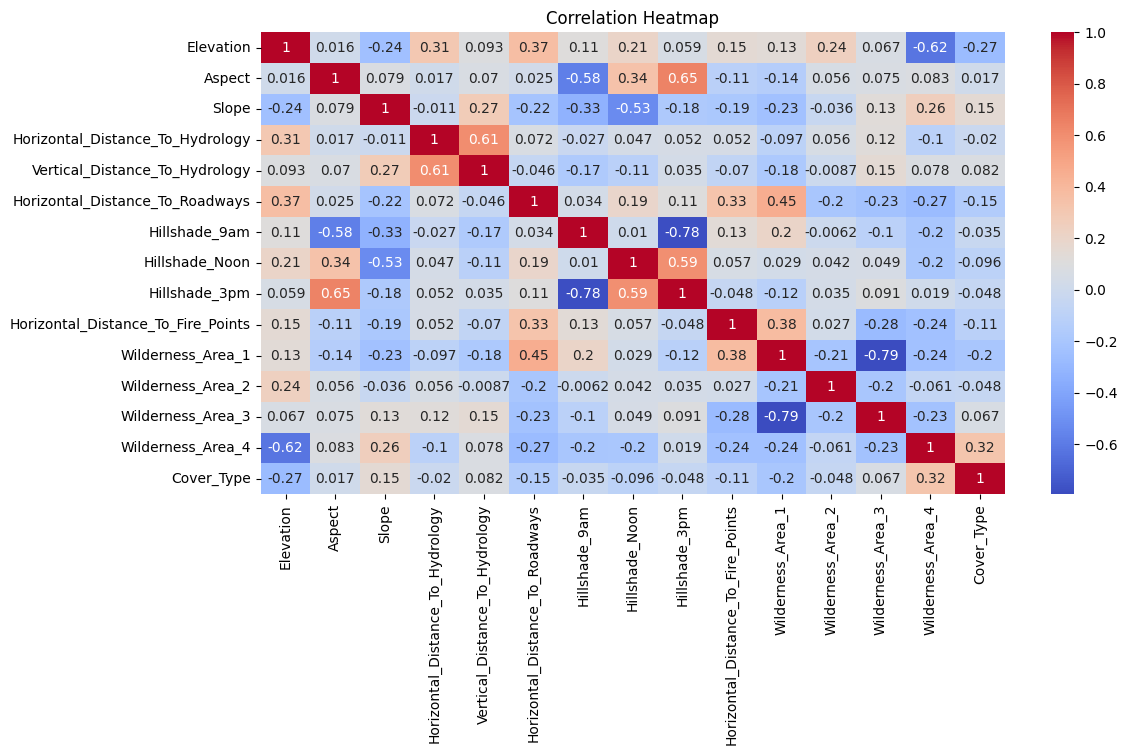

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [67]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_no_outliers

for column in df.columns[:-1]:
  df_new = remove_outliers_iqr(df, column)



In [68]:
df_new

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area_1  \
0                                     6279                  1   
1                                     6225                  1   
2                                     6121                  1   
3                                     6211                  1   
4                                     6172                  1   
...                                    ...                ...   
581007                                 837                  0   
581008                                 845                  0   
581009                                 854                  0   
581010                                 864                  0   
581011                                 875                  0   

        Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4  Cover_Type  
0                       0                  0                  0           5  
1                       0                  0                  0           5  
2                       0                  0                  0           2  
3                       0                  0                  0           2  
4                       0                  0                  0           5  
...                   ...                ...                ...         ...  
581007                  0                  1                  0           3  
581008                  0                  1                  0           3  
581009                  0                  1                  0           3  
581010                  0       

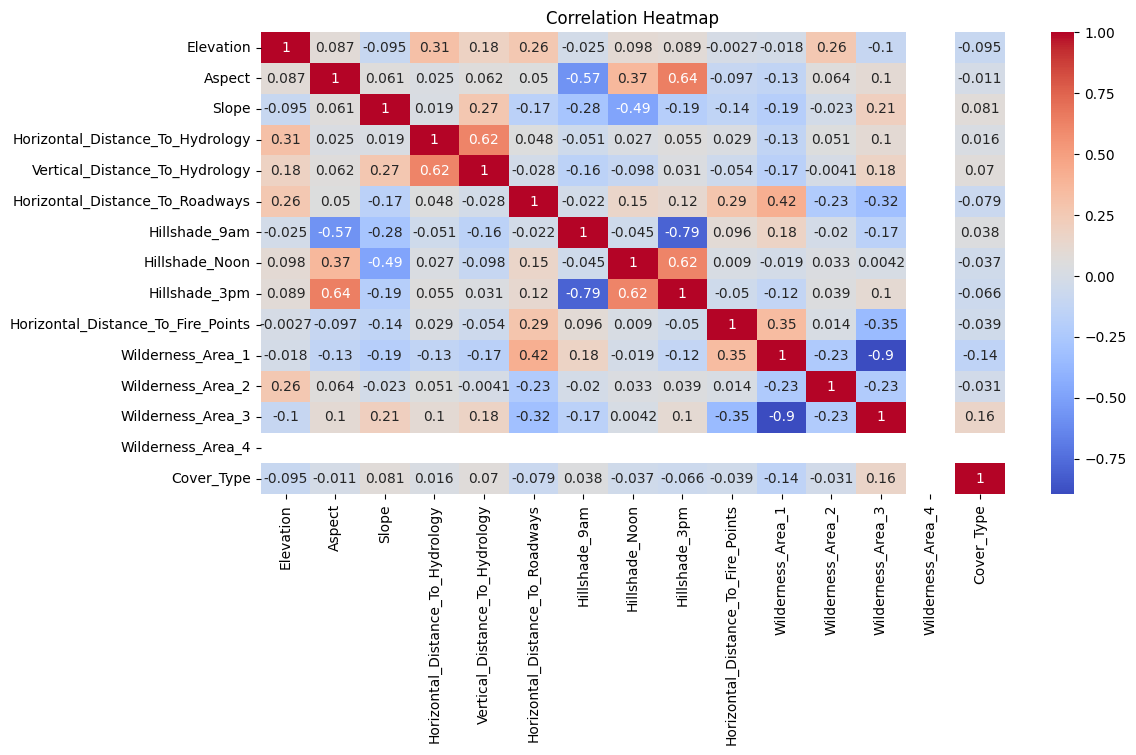

In [69]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_new.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [70]:
df_new.corr()

Elevation    Aspect     Slope  \
Elevation                            1.000000  0.087332 -0.095189   
Aspect                               0.087332  1.000000  0.061412   
Slope                               -0.095189  0.061412  1.000000   
Horizontal_Distance_To_Hydrology     0.313773  0.024881  0.019355   
Vertical_Distance_To_Hydrology       0.184822  0.062253  0.272756   
Horizontal_Distance_To_Roadways      0.264129  0.050190 -0.165168   
Hillshade_9am                       -0.025329 -0.573640 -0.275600   
Hillshade_Noon                       0.097937  0.366140 -0.486188   
Hillshade_3pm                        0.088829  0.642549 -0.194526   
Horizontal_Distance_To_Fire_Points  -0.002712 -0.097234 -0.136287   
Wilderness_Area_1                   -0.018454 -0.129965 -0.194913   
Wilderness_Area_2                    0.259867  0.063980 -0.022566   
Wilderness_Area_3                   -0.100215  0.100937  0.205513   
Wilderness_Area_4                         NaN       NaN       NaN   
Cover_Type                          -0.095118 -0.010985  0.081348   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.313773   
Aspect                                                      0.024881   
Slope                                                       0.019355   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.618259   
Horizontal_Distance_To_Roadways                             0.047517   
Hillshade_9am                                              -0.050881   
Hillshade_Noon                                              0.027219   
Hillshade_3pm                                               0.055160   
Horizontal_Distance_To_Fire_Points                          0.028735   
Wilderness_Area_1                                          -0.126513   
Wilderness_Area_2                                           0.050632   
Wilderness_Area_3                                           0.103577   
Wilderness_Area_4                                                NaN   
Cover_Type                                                  0.015692   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.184822   
Aspect                                                    0.062253   
Slope                                                     0.272756   
Horizontal_Distance_To_Hydrology                          0.618259   
Vertical_Distance_To_Hydrology                            1.000000   
Horizontal_Distance_To_Roadways                          -0.028432   
Hillshade_9am                                            -0.155678   
Hillshade_Noon                                           -0.098277   
Hillshade_3pm                                             0.031053   
Horizontal_Distance_To_Fire_Points                       -0.054479   
Wilderness_Area_1                                        -0.173157   
Wilderness_Area_2                                        -0.004139   
Wilderness_Area_3                                         0.175308   
Wilderness_Area_4                                              NaN   
Cover_Type                                                0.069925   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.264129   
Aspect                                                     0.050190   
Slope                                                     -0.165168   
Horizontal_Distance_To_Hydrology                           0.047517   
Vertical_Distance_To_Hydrology                            -0.028432   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                             -0.022004   
Hillshade_Noon                                             0.152673   
Hillshade_3pm     

In [81]:
X = df_new.iloc[:, :-1]
y = df_new.iloc[:, -1]


In [82]:
X

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                              510   
1                                   -6                              390   
2                                   65                             3180   
3                                  118                             3090   
4                                   -1                              391   
...                                ...                              ...   
581007                              17                              108   
581008                              12                               95   
581009                               7                               90   
581010                               5                               90   
581011                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0                 221             232            148   
1                 220             235            151   
2                 234             238            135   
3                 238             238            122   
4                 220             234            150   
...               ...             ...            ...   
581007            240             237            118   
581008            240             237            119   
581009            236             241            130   
581010            230             245            143   
581011            231             244            141   

        Horizontal_Distance_To_Fire_Points  Wilderness_Area_1  \
0                                     6279                  1   
1                                     6225                  1   
2                                     6121                  1   
3                                     6211                  1   
4                                     6172                  1   
...                                    ...                ...   
581007                                 837                  0   
581008                                 845                  0   
581009                                 854                  0   
581010                                 864                  0   
581011                                 875                  0   

        Wilderness_Area_2  Wilderness_Area_3  Wilderness_Area_4  
0                       0                  0                  0  
1                       0                  0                  0  
2                       0                  0                  0  
3                       0                  0                  0  
4                       0                  0                  0  
...                   ...                ...                ...  
581007                  0                  1                  0  
581008                  0                  1                  0  
581009                  0                  1                  0  
581010                  0                  1                  0  
581011                  0                  1                  0  

[544044 rows x 14 c

In [73]:
y

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 544044, dtype: int64

In [83]:
scale = MinMaxScaler()
X_Scaled = scale.fit_transform(X)

In [84]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_Scaled, y, test_size=0.3, random_state=4)

In [85]:
X_test1.shape,y_test1.shape

((163214, 14), (163214,))

In [86]:
RF=RandomForestClassifier(max_features='sqrt')
RF.fit(X_train1,y_train1)


RandomForestClassifier()

In [90]:
y_pred1=RF.predict(X_test1)
print(classification_report(y_test1,y_pred1))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63599
           2       0.94      0.97      0.96     84054
           3       0.93      0.93      0.93      4257
           5       0.94      0.71      0.81      2896
           6       0.90      0.83      0.86      2303
           7       0.98      0.93      0.96      6105

    accuracy                           0.95    163214
   macro avg       0.94      0.88      0.91    163214
weighted avg       0.95      0.95      0.95    163214



In [91]:
DT=DecisionTreeClassifier()
DT.fit(X_train1,y_train1)
y_pred2=DT.predict(X_test1)
print(classification_report(y_test1,y_pred2))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92     63599
           2       0.94      0.94      0.94     84054
           3       0.89      0.89      0.89      4257
           5       0.81      0.79      0.80      2896
           6       0.80      0.80      0.80      2303
           7       0.92      0.92      0.92      6105

    accuracy                           0.92    163214
   macro avg       0.88      0.88      0.88    163214
weighted avg       0.92      0.92      0.92    163214



In [80]:
import matplotlib.pyplot as plt
models = ['Random Forest', 'Decision Tree']
accuracies = [95,92]
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['red', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')




Text(0, 0.5, 'Accuracy')

In [ ]:

pickle.dump(RF,open('model.sav','wb'))

In [ ]:
pickle.dump(scale,open('scale.sav','wb'))

In [ ]:
#under sample
